# Telephone Churn Case Study

## Problem Statement

In the telecom industry, customers are able to choose from multiple service providers and actively switch from one operator to another. In this highly competitive market, the telecommunications industry experiences an average of 15-25% annual churn rate. Given the fact that it costs 5-10 times more to acquire a new customer than to retain an existing one, customer retention has now become even more important than customer acquisition.

For many incumbent operators, retaining high profitable customers is the number one business goal.

To reduce customer churn, telecom companies need to predict which customers are at high risk of churn.

In this project, We will analyse customer-level data of a leading telecom firm, build predictive models to identify customers at high risk of churn and identify the main indicators of churn.

## Analysis Approach :
* Telecommunications industry experiences an average of 15 - 25% annual churn rate. Given the fact that it costs 5-10 times more to acquire a new customer than to retain an existing one, customer retention has become even more important than customer acquisition.
* Here we are given with 4 months of data related to customer usage. In this case study, we analyse customer-level data of a leading telecom firm, build predictive models to identify customers at high risk of churn and identify the main indicators of churn.
* Churn is predicted using two approaches. Usage based churn and Revenue based churn. Usage based churn: Customers who have zero usage, either incoming or outgoing - in terms of calls, internet etc. over a period of time.
* This case study only considers usage based churn.
* In the Indian and the southeast Asian market, approximately 80% of revenue comes from the top 20% customers (called high-value customers). Thus, if we can reduce churn of the high-value customers, we will be able to reduce significant revenue leakage. Hence, this case study focuses on high value customers only.
* The dataset contains customer-level information for a span of four consecutive months - June, July, August and September. The months are encoded as 6, 7, 8 and 9, respectively.

* The business objective is to predict the churn in the last (i.e. the ninth) month using the data (features) from the first three months.

* This is a classification problem, where we need to predict whether the customers is about to churn or not. We have carried out Logistic Regression with PCA, PCA + Random Forest and Baseline Logistic Regression.  

## Analysis Steps
* Data Cleaning and EDA
* Data Preprocessing
* Building the model with PCA
* Evaluating the model with PCA
* Building and Evaluating the model with Logistic regression without PCA
* Recommendations

In [1]:
#Importing the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set(style="whitegrid")
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_colwidth', None)
pd.options.display.float_format = '{:20,.2f}'.format
import math

import warnings
warnings.filterwarnings('ignore')

import numpy as np, pandas as pd
from google.colab import files

uploaded = files.upload()

In [2]:
# Reading the dataset
df = pd.read_csv("telecom_churn_data.csv")
df.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,date_of_last_rech_data_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,7000842753,109,0.00,0.00,0.00,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.38,214.82,213.80,21.10,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,0.00,0.00,0.00,0.00,NaN,NaN,0.16,NaN,NaN,NaN,4.13,NaN,NaN,NaN,1.15,NaN,NaN,NaN,5.44,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,0.00,0.00,5.44,0.00,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,Na

In [3]:
df.shape

(99999, 226)

In [4]:
df.info(verbose=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Data columns (total 226 columns):
 #    Column                    Dtype  
---   ------                    -----  
 0    mobile_number             int64  
 1    circle_id                 int64  
 2    loc_og_t2o_mou            float64
 3    std_og_t2o_mou            float64
 4    loc_ic_t2o_mou            float64
 5    last_date_of_month_6      object 
 6    last_date_of_month_7      object 
 7    last_date_of_month_8      object 
 8    last_date_of_month_9      object 
 9    arpu_6                    float64
 10   arpu_7                    float64
 11   arpu_8                    float64
 12   arpu_9                    float64
 13   onnet_mou_6               float64
 14   onnet_mou_7               float64
 15   onnet_mou_8               float64
 16   onnet_mou_9               float64
 17   offnet_mou_6              float64
 18   offnet_mou_7              float64
 19   offnet_mou_8              float64
 20   offn

In [5]:
df.describe()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
count,"99,999.00","99,999.00","98,981.00","98,981.00","98,981.00","99,999.00","99,999.00","99,999.00","99,999.00","96,062.00","96,140.00","94,621.00","92,254.00","96,062.00","96,140.00","94,621.00","92,254.00","96,062.00","96,140.00","94,621.00","92,254.00","96,062.00","96,140.00","94,621.00","92,254.00","96,062.00","96,140.00","94,621.00","92,254.00","96,062.00","96,140.00","94,621.00","92,254.00","96,062.00","96,140.00","94,621.00","92,254.00","96,062.00","96,140.00","94,621.00","92,254.00","96,062.00","96,140.00","94,621.00","92,254.00","96,062.00","96,140.00","94,621.00","92,254.00","96,062.00","96,140.00","94,621.00","92,254.00","96,062.00","96,140.00","94,621.00","92,254.00","96,062.00","96,140.00","94,621.00","92,254.00","96,062.00","96,140.00","94,621.00","92,254.00","96,062.00","96,140.00","94,621.00","92,254.00","96,062.00","96,140.00","94,621.00","92,254.00","96,062.00",

In [6]:
# Creating column name list by types of columns
id_cols = ['mobile_number', 'circle_id']
date_cols = ['last_date_of_month_6','last_date_of_month_7','last_date_of_month_8','last_date_of_month_9','date_of_last_rech_6','date_of_last_rech_7','date_of_last_rech_8','date_of_last_rech_9','date_of_last_rech_data_6','date_of_last_rech_data_7','date_of_last_rech_data_8','date_of_last_rech_data_9']
cat_cols =  ['night_pck_user_6','night_pck_user_7','night_pck_user_8','night_pck_user_9','fb_user_6','fb_user_7','fb_user_8','fb_user_9']
num_cols = [column for column in df.columns if column not in id_cols + date_cols + cat_cols]

In [7]:
print(len(id_cols), len(date_cols), len(num_cols), len(cat_cols))

2 12 204 8


## Data Cleaning

In [8]:
# Checking missing values percentages
pd.set_option('display.max_rows', None)
telecom_null_check = 100*df.isnull().sum()/len(df)
DF = pd.DataFrame(telecom_null_check)
DF.rename(columns={0:'Null_Percentage'}, inplace=True)
DF.sort_values('Null_Percentage', ascending=False)

,Null_Percentage
arpu_3g_6,74.85
night_pck_user_6,74.85
total_rech_data_6,74.85
arpu_2g_6,74.85
max_rech_data_6,74.85
fb_user_6,74.85
av_rech_amt_data_6,74.85
date_of_last_rech_data_6,74.85
count_rech_2g_6,74.85
count_rech_3g_6,74.85


In [9]:
# Null columns list
Missing_Vals_Column_70=list(DF.index[DF['Null_Percentage'] > 70])
(Missing_Vals_Column_70)

['date_of_last_rech_data_6',
 'date_of_last_rech_data_7',
 'date_of_last_rech_data_8',
 'date_of_last_rech_data_9',
 'total_rech_data_6',
 'total_rech_data_7',
 'total_rech_data_8',
 'total_rech_data_9',
 'max_rech_data_6',
 'max_rech_data_7',
 'max_rech_data_8',
 'max_rech_data_9',
 'count_rech_2g_6',
 'count_rech_2g_7',
 'count_rech_2g_8',
 'count_rech_2g_9',
 'count_rech_3g_6',
 'count_rech_3g_7',
 'count_rech_3g_8',
 'count_rech_3g_9',
 'av_rech_amt_data_6',
 'av_rech_amt_data_7',
 'av_rech_amt_data_8',
 'av_rech_amt_data_9',
 'arpu_3g_6',
 'arpu_3g_7',
 'arpu_3g_8',
 'arpu_3g_9',
 'arpu_2g_6',
 'arpu_2g_7',
 'arpu_2g_8',
 'arpu_2g_9',
 'night_pck_user_6',
 'night_pck_user_7',
 'night_pck_user_8',
 'night_pck_user_9',
 'fb_user_6',
 'fb_user_7',
 'fb_user_8',
 'fb_user_9']

We have to exclude max_recharge, total_recharge data and av_rech_amt data columns as it might provide us some useful insights

In [10]:
# Removing the columns as per above condition
Missing_Vals_Column_70=df.columns[round(100*df.isnull().sum()/len(df),2)> 70]
data_col=['max_rech_data_6','max_rech_data_7','max_rech_data_8','max_rech_data_9','total_rech_data_6','total_rech_data_7','total_rech_data_8','total_rech_data_9','av_rech_amt_data_6','av_rech_amt_data_7','av_rech_amt_data_8','av_rech_amt_data_9']
Missing_Vals_Column_70=[col for col in Missing_Vals_Column_70 if col not in data_col]
df=df.drop(Missing_Vals_Column_70,axis=1)
df.shape

(99999, 198)

In [11]:
# Checking missing values percentages again
def check_null(X):
    pd.set_option('display.max_rows', None)
    telecom_null_check_2 = 100*X.isnull().sum()/len(X)
    DF = pd.DataFrame(telecom_null_check_2)
    DF.rename(columns={0:'Null_Percentage'}, inplace=True)
    return DF.sort_values('Null_Percentage', ascending=False)

check_null(df)

,Null_Percentage
av_rech_amt_data_6,74.85
max_rech_data_6,74.85
total_rech_data_6,74.85
max_rech_data_7,74.43
total_rech_data_7,74.43
av_rech_amt_data_7,74.43
max_rech_data_9,74.08
total_rech_data_9,74.08
av_rech_amt_data_9,74.08
max_rech_data_8,73.66


In the recharge columns, the minimum value is 1 so we can impute the NA values by 0, meaning that there was no recharge done by the customer.

In [12]:
#imputing NA with 0 in recharge columns
impute_na_rech = ['total_rech_data_6', 'total_rech_data_7', 'total_rech_data_8', 'total_rech_data_9',
        'av_rech_amt_data_6', 'av_rech_amt_data_7', 'av_rech_amt_data_8', 'av_rech_amt_data_9',
        'max_rech_data_6', 'max_rech_data_7', 'max_rech_data_8', 'max_rech_data_9'
       ]

In [13]:
# Now impute missing values with 0
df[impute_na_rech] = df[impute_na_rech].apply(lambda x: x.fillna(0))

In [14]:
print(df[impute_na_rech].isnull().sum()*100/df.shape[1])

total_rech_data_6                    0.00
total_rech_data_7                    0.00
total_rech_data_8                    0.00
total_rech_data_9                    0.00
av_rech_amt_data_6                   0.00
av_rech_amt_data_7                   0.00
av_rech_amt_data_8                   0.00
av_rech_amt_data_9                   0.00
max_rech_data_6                      0.00
max_rech_data_7                      0.00
max_rech_data_8                      0.00
max_rech_data_9                      0.00
dtype: float64


In [15]:
# we do not require the id and date columns
dropping = id_cols + date_cols
initial_cols = df.shape[1]
cols_to_drop=[col for col in dropping if col in df.columns]
df=df.drop(cols_to_drop,axis=1)
df.shape

(99999, 188)

since the columns reamining with the null values are of duration for a Type of call made, So 0 would mean No call of that particular type was made by that customer.

In [16]:
# imputing the remaining null columns as 0.
df[df.select_dtypes(exclude=['datetime64[ns]','category']).columns.tolist()] = df[df.select_dtypes(exclude=['datetime64[ns]','category']).columns.tolist()].fillna(0, axis=1)

In [17]:
check_null(df)

,Null_Percentage
loc_og_t2o_mou,0.00
ic_others_8,0.00
spl_ic_mou_7,0.00
spl_ic_mou_8,0.00
spl_ic_mou_9,0.00
isd_ic_mou_6,0.00
isd_ic_mou_7,0.00
isd_ic_mou_8,0.00
isd_ic_mou_9,0.00
ic_others_6,0.00


In [18]:
df.describe()

,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
count,"99,999.00","99,999.00","99,999.00","99,999.00","99,999.00","99,999.00","99,999.00","99,999.00","99,999.00","99,999.00","99,999.00","99,999.00","99,999.00","99,999.00","99,999.00","99,999.00","99,999.00","99,999.00","99,999.00","99,999.00","99,999.00","99,999.00","99,999.00","99,999.00","99,999.00","99,999.00","99,999.00","99,999.00","99,999.00","99,999.00","99,999.00","99,999.00","99,999.00","99,999.00","99,999.00","99,999.00","99,999.00","99,999.00","99,999.00","99,999.00","99,999.00","99,999.00","99,999.00","99,999.00","99,999.00","99,999.00","99,999.00","99,999.00","99,999.00","99,999.00","99,999.00","99,999.00","99,999.00","99,999.00","99,999.00","99,999.00","99,999.00","99,999.00","99,999.00","99,999.00","99,999.00","99,999.00","99,999.00","99,999.00","99,999.00","99,999.00","99,999.00","99,999.00","99,999.00","99,999.00","99,999.00","99,999.00","99,999.00","99,999.00","99,999.00","99,999.00","99,999.00","99,999.00","99,999.00","99,999.00","99,999.00","99,999.00","99,999.00","99,999.00","99,999.00","99,999.00","99,999.00","99,999.00","99,999.00","99,999.00","99,999.00","99,999.00","99,999.00","99,999.00","99,999.00","99,999.00","99,999.00","99,999.00","99,999.00","99,999.00","99,999.00","99,999.00","99,

In the data description there are some columns with 0 standard deviation

In [19]:
print(df.loc_og_t2o_mou.value_counts(dropna= False))
print(df.std_og_t2o_mou.value_counts(dropna= False))
print(df.loc_ic_t2o_mou.value_counts(dropna= False))

loc_og_t2o_mou
0.00    99999
Name: count, dtype: int64
std_og_t2o_mou
0.00    99999
Name: count, dtype: int64
loc_ic_t2o_mou
0.00    99999
Name: count, dtype: int64


- These columns have 0 value and missing values.
- As it's minutes of usage column it can not be categorical.
- Even if we impute these missing values using mean, median imputation, the value will be 0.
- That will make these columns zero variance column with mean 0.
- Information Value for these columns will be 0 and hence dropping these columns would be fine.

In [20]:
# dropping above 3 columns
df.drop(['loc_og_t2o_mou', 'std_og_t2o_mou', 'loc_ic_t2o_mou'], axis= 1, inplace= True)

In [21]:
df.shape

(99999, 185)

In [22]:
# Define a function to drop columns with only 1 unique value
def drop_cols_with_one_unique_value(df):
    cols_to_drop = [col for col in df.columns if df[col].nunique() == 1]
    df = df.drop(cols_to_drop, axis=1)
    return df

df = drop_cols_with_one_unique_value(df)
print(df.shape)

(99999, 177)


In [23]:
check_null(df)

,Null_Percentage
arpu_6,0.00
std_ic_t2t_mou_7,0.00
isd_ic_mou_7,0.00
isd_ic_mou_8,0.00
isd_ic_mou_9,0.00
ic_others_6,0.00
ic_others_7,0.00
ic_others_8,0.00
ic_others_9,0.00
total_rech_num_6,0.00


Now there are no more missing values present in the data

## Data Preparation

As mentioned in the problem statement 6th and 7th month are good phase. So, creating a column avg_rech_6_7 by taking average of total recharge of 6th & 7th month

In [24]:
# Get the index of null vals for both columns and verify if both matches
# if the result is false it means all rows of total_rech_data and av_rech_amt_data has null at same rows.
res = df.total_rech_data_6[df.total_rech_data_6.isna()].index != df.av_rech_amt_data_6[df.av_rech_amt_data_6.isna()].index
print('June :', res.any())
res = df.total_rech_data_7[df.total_rech_data_7.isna()].index != df.av_rech_amt_data_7[df.av_rech_amt_data_7.isna()].index
print('July :', res.any())
res = df.total_rech_data_8[df.total_rech_data_8.isna()].index != df.av_rech_amt_data_8[df.av_rech_amt_data_8.isna()].index
print('August :', res.any())

June : False
July : False
August : False


Now we can be assured that if total_rech_data is null then avg_rech_amt_data is also null

In [25]:
df['avg_rech_6_7'] = (df['total_rech_amt_6'] + df['total_rech_amt_7']) / 2

**Defining high-value customers as follows:**

- Those who have recharged with an amount more than or equal to X, where X is greater than 70th percentile of the average recharge amount in the first two months (the good phase)

In [26]:
# 70th percentile for the new column
X = df['avg_rech_6_7'].quantile(0.7)
X

368.5

In [27]:
# filtering only the customers who have recharger more than X i.e high value customers.
df = df[df['avg_rech_6_7'] >= X]
df.head()

,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,avg_rech_6_7
7,"1,069.18","1,349.85","3,171.48",500.00,57.84,54.68,52.29,0.00,453.43,567.16,325.91,0.00,16.23,33.49,31.64,0.00,23.74,12.59,38.06,0.00,51.39,31.38,40.28,0.00,308.63,447.38,162.28,0.00,62.13,55.14,53.23,0.00,0.00,0.00,0.00,0.00,422.16,533.91,255.79,0.00,4.30,23.29,12.01,0.00,49.89,31.76,49.14,0.00,6.66,20.08,16.68,0.00,60.86,75.14,77.84,0.00,0.00,0.18,10.01,0.00,4.50,0.00,6.50,0.00,0.00,0.00,0.00,0.00,487.53,609.24,350.16,0.00,58.14,32.26,27.31,0.00,217.56,221.49,121.19,0.00,152.16,101.46,39.53,0.00,427.88,355.23,188.04,0.00,36.89,11.83,30.39,0.00,91.44,126.99,141.33,0.00,52.19,34.24,22.21,0.00,180.54,173.08,193.94,0.00,626.46,558.04,428.74,0.00,0.21,0.00,0.00,0.00,2.06,14.53,31.59,0.00,15.74,15.19,15.14,0.00,5.00,5.00,7.00,3.00,"1,580.00",790.00,"3,638.00",0.00,"1,580.00",790.00,"1,580.00",0.00,0.00,0.00,779.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,802.00,57.74,19.38,18.74,0.00,"1,185.00"
8,378.72,492.22,137.36,166.79,413.69,351.03,35.08,33.46,94.66,80.63,136.48,108.71,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,297.13,217.59,12.49,26.13,80.96,70.58,50.54,34.58,0.00,0.00,0.00,0.00,0.00,0.00,7.15,0.00,378.09,288.18,63.04,60.71,116.56,133.43,22.58,7.33,13.69,10.04,75.69,74.13,0.00,0.00,0.00,0.00,130.26,143.48,98.28,81.46,0.00,0.00,0.00,0.0

Checking if there are missing values in any rows

In [28]:
# counting the rows having more than 50% missing values.
missing_rows = df[(df.isnull().sum(axis=1)) > (len(df.columns)//2)]
missing_rows

,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,avg_rech_6_7


In [29]:
df.shape

(30011, 178)

**Tagging the Churners**
- churn = 1
- not churn = 0

Now to tag the churned customers based on the fourth month as follows:
- They may have not made any calls (either incoming or outgoing) And have not used mobile internet even once in the churn phase.

We'll use total_ic_mou_9, total_og_mou_9, vol_2g_mb_9, vol_3g_mb_9 columns to tag the churners.

For churners there will not be any voice and data usage.

In [30]:
df['Churn']= np.where((df['total_ic_mou_9']==0) & (df['total_og_mou_9']==0) & (df['vol_2g_mb_9']==0) & (df['vol_3g_mb_9']==0), 1, 0)

In [31]:
df.head()

,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,avg_rech_6_7,Churn
7,"1,069.18","1,349.85","3,171.48",500.00,57.84,54.68,52.29,0.00,453.43,567.16,325.91,0.00,16.23,33.49,31.64,0.00,23.74,12.59,38.06,0.00,51.39,31.38,40.28,0.00,308.63,447.38,162.28,0.00,62.13,55.14,53.23,0.00,0.00,0.00,0.00,0.00,422.16,533.91,255.79,0.00,4.30,23.29,12.01,0.00,49.89,31.76,49.14,0.00,6.66,20.08,16.68,0.00,60.86,75.14,77.84,0.00,0.00,0.18,10.01,0.00,4.50,0.00,6.50,0.00,0.00,0.00,0.00,0.00,487.53,609.24,350.16,0.00,58.14,32.26,27.31,0.00,217.56,221.49,121.19,0.00,152.16,101.46,39.53,0.00,427.88,355.23,188.04,0.00,36.89,11.83,30.39,0.00,91.44,126.99,141.33,0.00,52.19,34.24,22.21,0.00,180.54,173.08,193.94,0.00,626.46,558.04,428.74,0.00,0.21,0.00,0.00,0.00,2.06,14.53,31.59,0.00,15.74,15.19,15.14,0.00,5.00,5.00,7.00,3.00,"1,580.00",790.00,"3,638.00",0.00,"1,580.00",790.00,"1,580.00",0.00,0.00,0.00,779.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,802.00,57.74,19.38,18.74,0.00,"1,185.00",1
8,378.72,492.22,137.36,166.79,413.69,351.03,35.08,33.46,94.66,80.63,136.48,108.71,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,297.13,217.59,12.49,26.13,80.96,70.58,50.54,34.58,0.00,0.00,0.00,0.00,0.00,0.00,7.15,0.00,378.09,288.18,63.04,60.71,116.56,133.43,22.58,7.33,13.69,10.04,75.69,74.13,0.00,0.00,0.00,0.00,130.26,143.48,98.28,81.46,0.00,0.00,

In [32]:
df['Churn'].value_counts()

Churn
0    27418
1     2593
Name: count, dtype: int64

- After tagging churners, we will remove all the attributes corresponding to the churn phase (all attributes having '_9', etc. in their names)

In [33]:
columns_9 = [col for col in df.columns.to_list() if '_9' in col]
print(columns_9)

['arpu_9', 'onnet_mou_9', 'offnet_mou_9', 'roam_ic_mou_9', 'roam_og_mou_9', 'loc_og_t2t_mou_9', 'loc_og_t2m_mou_9', 'loc_og_t2f_mou_9', 'loc_og_t2c_mou_9', 'loc_og_mou_9', 'std_og_t2t_mou_9', 'std_og_t2m_mou_9', 'std_og_t2f_mou_9', 'std_og_mou_9', 'isd_og_mou_9', 'spl_og_mou_9', 'og_others_9', 'total_og_mou_9', 'loc_ic_t2t_mou_9', 'loc_ic_t2m_mou_9', 'loc_ic_t2f_mou_9', 'loc_ic_mou_9', 'std_ic_t2t_mou_9', 'std_ic_t2m_mou_9', 'std_ic_t2f_mou_9', 'std_ic_mou_9', 'total_ic_mou_9', 'spl_ic_mou_9', 'isd_ic_mou_9', 'ic_others_9', 'total_rech_num_9', 'total_rech_amt_9', 'max_rech_amt_9', 'last_day_rch_amt_9', 'total_rech_data_9', 'max_rech_data_9', 'av_rech_amt_data_9', 'vol_2g_mb_9', 'vol_3g_mb_9', 'monthly_2g_9', 'sachet_2g_9', 'monthly_3g_9', 'sachet_3g_9']


In [34]:
# deleting the churn month columns
df = df.drop(columns_9, axis=1)

In [35]:
# dropping sep_vbc_3g column
df = df.drop('sep_vbc_3g', axis=1)

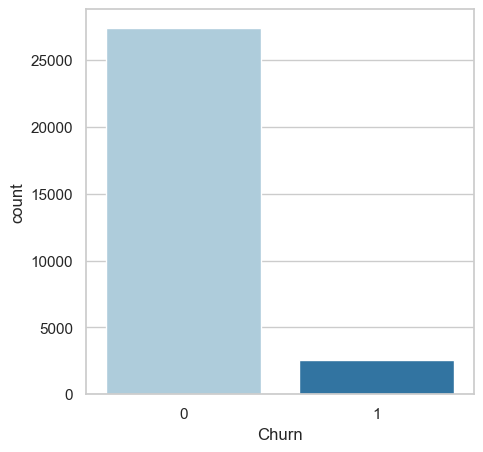

In [36]:
# checking churn data
plt.figure(figsize=[5, 5])
sns.countplot(x='Churn', data=df, palette='Paired', label=[1, 0])
plt.show()

In [37]:
# checking the churn rate
round(100*(df['Churn'].mean()),2)

8.64

- This tells us that 8.6% customers have churned.
- It indicates class imbalance, we can take care of it by using SMOTE later.

### Outlier Treatment

In [38]:
# converting the Churn column to object data type in order to proceed with the outlier treatment.

df['Churn'] = df['Churn'].astype(object)

In [39]:
# listing numeric columns only

num_cols = df.select_dtypes(exclude=['object']).columns
print(num_cols)

Index(['arpu_6', 'arpu_7', 'arpu_8', 'onnet_mou_6', 'onnet_mou_7',
       'onnet_mou_8', 'offnet_mou_6', 'offnet_mou_7', 'offnet_mou_8',
       'roam_ic_mou_6',
       ...
       'monthly_3g_7', 'monthly_3g_8', 'sachet_3g_6', 'sachet_3g_7',
       'sachet_3g_8', 'aon', 'aug_vbc_3g', 'jul_vbc_3g', 'jun_vbc_3g',
       'avg_rech_6_7'],
      dtype='object', length=134)


In [40]:
df.describe(percentiles=[0.01, 0.10,.25,.5,.75,.90,.95,.99])

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,avg_rech_6_7
count,"30,011.00","30,011.00","30,011.00","30,011.00","30,011.00","30,011.00","30,011.00","30,011.00","30,011.00","30,011.00","30,011.00","30,011.00","30,011.00","30,011.00","30,011.00","30,011.00","30,011.00","30,011.00","30,011.00","30,011.00","30,011.00","30,011.00","30,011.00","30,011.00","30,011.00","30,011.00","30,011.00","30,011.00","30,011.00","30,011.00","30,011.00","30,011.00","30,011.00","30,011.00","30,011.00","30,011.00","30,011.00","30,011.00","30,011.00","30,011.00","30,011.00","30,011.00","30,011.00","30,011.00","30,011.00","30,011.00","30,011.00","30,011.00","30,011.00","30,011.00","30,011.00","30,011.00","30,011.00","30,011.00","30,011.00","30,011.00","30,011.00","30,011.00","30,011.00","30,011.00","30,011.00","30,011.00","30,011.00","30,011.00","30,011.00","30,011.00","30,011.00","30,011.00","30,011.00","30,011.00","30,011.00","30,011.00","30,011.00","30,011.00","30,011.00","30,011.00","30,011.00","30,011.00","30,011.00","30,011.00","30,011.00","30,011.00","30,011.00","30,011.00","30,011.00","30,011.00","30,011.00","30,011.00","30,011.00","30,011.00","30,011.00","30,011.00","30,011.00","30,011.00","30,011.00","30,011.00","30,011.00","30,011.00","30,011.00","30,011.00","30,011.00","30,011.00","30,011.00","30,011.00","30,011.00","30,011.00","30,011.00","30,011.00","30,011.00","30,011.00","30,011.00","30,011.00","30,011.00","30,011.00","30,011.00","30,011.00","30,011.00","30,011.00","30,011.00","30,011.00","30,011.00","30,011.00","30,011.00","30,011.00","30,011.00","30,011.00","30,011.00","30,011.00","30,011.00","30,011.00","30,011.00","30,011.00","30,011.00","30,011.00"
mean,587.28,589.14,534.86,296.03,304.34,267.60,417.93,423.92,375.02,17.41,13.52,13.26,29.32,22.04,21.47,94.68,95.73,87.14,181.28,181.27,167.59,6.98,7.10,6.49,1.57,1.86,1.71,282.95,284.11,261.23,189.75,199.88,172.20,203.10,213.41,179.57,2.01,2.03,1.79,394.87,415.33,353.56,2.26,2.21,2.03,5.92,7.43,6.89,0.69,0.05,0.06,686.70,709.12,623.77,68.75,70.31,65.94,159.61,160.81,153.63,15.60,16.51,14.71,243.97,247.64,234.28,16.23,16.89,15.05

In [41]:
# removing outliers below 10th and above 90th percentile
for col in num_cols:
    q1 = df[col].quantile(0.10)
    q3 = df[col].quantile(0.90)
    iqr = q3-q1
    range_low  = q1-1.5*iqr
    range_high = q3+1.5*iqr

    # assigning the filtered dataset into new_df
    new_df = df.loc[(df[col] > range_low) & (df[col] < range_high)]

new_df.shape

(29700, 135)

### Now, we can add new columns with some insights

- Adding **dec_rech_action**
- Indicating if the number of recharge for a customer has decreased in action phase or not when compared to good phase. (yes = 1, no = 0)

In [42]:
# average recharge number at good phase
# we are taking average because there are two months (6 and 7) in good phase
new_df['avg_rech_num_good'] = (new_df['total_rech_num_6'] + new_df['total_rech_num_7']) / 2

# difference between avg_rech_num_good and total_rech_num_7 (action - good)
new_df['diff_rech_num'] = new_df['total_rech_num_8'] - new_df['avg_rech_num_good']

In [43]:
# Checking if recharge number has decreased in action phase, 1=Yes, 0=No
new_df['dec_rech_action'] = np.where((new_df['diff_rech_num'] < 0), 1, 0)

In [44]:
new_df.head(10)

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,avg_rech_6_7,Churn,avg_rech_num_good,diff_rech_num,dec_rech_action
7,"1,069.18","1,349.85","3,171.48",57.84,54.68,52.29,453.43,567.16,325.91,16.23,33.49,31.64,23.74,12.59,38.06,51.39,31.38,40.28,308.63,447.38,162.28,62.13,55.14,53.23,0.00,0.00,0.00,422.16,533.91,255.79,4.30,23.29,12.01,49.89,31.76,49.14,6.66,20.08,16.68,60.86,75.14,77.84,0.00,0.18,10.01,4.50,0.00,6.50,0.00,0.00,0.00,487.53,609.24,350.16,58.14,32.26,27.31,217.56,221.49,121.19,152.16,101.46,39.53,427.88,355.23,188.04,36.89,11.83,30.39,91.44,126.99,141.33,52.19,34.24,22.21,180.54,173.08,193.94,626.46,558.04,428.74,0.21,0.00,0.00,2.06,14.53,31.59,15.74,15.19,15.14,5.00,5.00,7.00,"1,580.00",790.00,"3,638.00","1,580.00",790.00,"1,580.00",0.00,0.00,779.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,802.00,57.74,19.38,18.74,"1,185.00",1,5.00,2.00,0
8,378.72,492.22,137.36,413.69,351.03,35.08,94.66,80.63,136.48,0.00,0.00,0.00,0.00,0.00,0.00,297.13,217.59,12.49,80.96,70.58,50.54,0.00,0.00,0.00,0.00,0.00,7.15,378.09,288.18,63.04,116.56,133.43,22.58,13.69,10.04,75.69,0.00,0.00,0.00,130.26,143.48,98.28,0.00,0.00,0.00,0.00,0.00,10.23,0.00,0.00,0.00,508.36,431.66,171.56,23.84,9.84,0.31,57.58,13.98,15.48,0.00,0.00,0.00,81.43,23.83,15.79,0.00,0.58,0.10,22.43,4.08,0.65,0.00,0.00,0.00,22.43,4.66,0.75,103.86,28.49,16.54,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,19.00,21.00,14.00,437.00,601.00,120.00,90.00,154.00,30.00,50.00,0.00,10.00,0.00,2.00,3.00,0.00,154.00,23.00,0.00,177.00,69.00,0.00,356.00,0.03,0.00,750.95,11.94,0.00,1.00,0.00,0.00,1.00,3.00,0.00,0.00,0.00,0.00,0.00,0.00,315.00,21.03,910.65,122.16,519.00,0,20.00,-6.00,1
13,492.85,205.67,593.26,501.76,108.39,534.24,413.31,119.28,482.46,23.53,144.24,72.11,7.98,35.26,1.44,49.63,6.19,36.01,151.13,47.28,294.46,4.54,0.00,23.51,0.00,0.00,0.49,205.31,53.48,353.99,446.41,85.98,498.23,255.36,52.94,156.94,0.00,0.00,0.00,701.78,138.93,655.18,0.00,0.00,1.29,0.00,0.00,4.78,0.00,0.00,0.00,907.09,192.41,"1,015.26",67.88,7.58,52.58,142.88,18.53,1

- Adding **dec_arpu_action**
- Indicating if average revenue per customer when compared to good phase is decreased in action phase or not

In [45]:
# average arpu in good phase
# We are taking average because there are two months (6 and 7) in good phase
new_df['avg_arpu_good'] = (new_df['arpu_6'] + new_df['arpu_7']) / 2

# difference of good and action phase arpu
new_df['diff_arpu'] = new_df['arpu_8'] - new_df['avg_arpu_good']

In [46]:
# Checking whether the arpu has decreased on the action month, 1=Yes, 0=No
new_df['dec_arpu_action'] = np.where((new_df['diff_arpu'] < 0), 1, 0)

In [47]:
new_df.head(10)

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,avg_rech_6_7,Churn,avg_rech_num_good,diff_rech_num,dec_rech_action,avg_arpu_good,diff_arpu,dec_arpu_action
7,"1,069.18","1,349.85","3,171.48",57.84,54.68,52.29,453.43,567.16,325.91,16.23,33.49,31.64,23.74,12.59,38.06,51.39,31.38,40.28,308.63,447.38,162.28,62.13,55.14,53.23,0.00,0.00,0.00,422.16,533.91,255.79,4.30,23.29,12.01,49.89,31.76,49.14,6.66,20.08,16.68,60.86,75.14,77.84,0.00,0.18,10.01,4.50,0.00,6.50,0.00,0.00,0.00,487.53,609.24,350.16,58.14,32.26,27.31,217.56,221.49,121.19,152.16,101.46,39.53,427.88,355.23,188.04,36.89,11.83,30.39,91.44,126.99,141.33,52.19,34.24,22.21,180.54,173.08,193.94,626.46,558.04,428.74,0.21,0.00,0.00,2.06,14.53,31.59,15.74,15.19,15.14,5.00,5.00,7.00,"1,580.00",790.00,"3,638.00","1,580.00",790.00,"1,580.00",0.00,0.00,779.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,802.00,57.74,19.38,18.74,"1,185.00",1,5.00,2.00,0,"1,209.51","1,961.97",0
8,378.72,492.22,137.36,413.69,351.03,35.08,94.66,80.63,136.48,0.00,0.00,0.00,0.00,0.00,0.00,297.13,217.59,12.49,80.96,70.58,50.54,0.00,0.00,0.00,0.00,0.00,7.15,378.09,288.18,63.04,116.56,133.43,22.58,13.69,10.04,75.69,0.00,0.00,0.00,130.26,143.48,98.28,0.00,0.00,0.00,0.00,0.00,10.23,0.00,0.00,0.00,508.36,431.66,171.56,23.84,9.84,0.31,57.58,13.98,15.48,0.00,0.00,0.00,81.43,23.83,15.79,0.00,0.58,0.10,22.43,4.08,0.65,0.00,0.00,0.00,22.43,4.66,0.75,103.86,28.49,16.54,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,19.00,21.00,14.00,437.00,601.00,120.00,90.00,154.00,30.00,50.00,0.00,10.00,0.00,2.00,3.00,0.00,154.00,23.00,0.00,177.00,69.00,0.00,356.00,0.03,0.00,750.95,11.94,0.00,1.00,0.00,0.00,1.00,3.00,0.00,0.00,0.00,0.00,0.00,0.00,315.00,21.03,910.65,122.16,519.00,0,20.00,-6.00,1,435.47,-298.11,1
13,492.85,205.67,593.26,501.76,108.39,534.24,413.31,119.28,482.46,23.53,144.24,72.11,7.98,35.26,1.44,49.63,6.19,36.01,151.13,47.28,294.46,4.54,0.00,23.51,0.00,0.00,0.49,205.31,53.48,353.99,446.41,85.98,498.23,255.36,52.94,156.94,0.00,0.00,0.00,701.78,138.93,655.18,0.00,0.00,1.29,0.00,

- Adding **dec_rech_amt_action**
- Indicating if recharge amount of customers when compared to good phase is decreased in action phase or not

In [48]:
# Avg recharge amount in good phase
# we are taking average because there are two months (6 and 7) in good phase
new_df['avg_rech_amt_good'] = (new_df['total_rech_amt_6'] + new_df['total_rech_amt_7']) / 2

# difference of action phase recharge amount and good phase recharge amount
new_df['diff_rech_amt'] = new_df['total_rech_amt_8'] - new_df['avg_rech_amt_good']

In [49]:
# checking if recharge amount has decreased in action phase, 1=Yes, 0=No
new_df['dec_rech_amt_action'] = np.where((new_df['diff_rech_amt'] < 0), 1, 0)

In [50]:
new_df.head(10)

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,avg_rech_6_7,Churn,avg_rech_num_good,diff_rech_num,dec_rech_action,avg_arpu_good,diff_arpu,dec_arpu_action,avg_rech_amt_good,diff_rech_amt,dec_rech_amt_action
7,"1,069.18","1,349.85","3,171.48",57.84,54.68,52.29,453.43,567.16,325.91,16.23,33.49,31.64,23.74,12.59,38.06,51.39,31.38,40.28,308.63,447.38,162.28,62.13,55.14,53.23,0.00,0.00,0.00,422.16,533.91,255.79,4.30,23.29,12.01,49.89,31.76,49.14,6.66,20.08,16.68,60.86,75.14,77.84,0.00,0.18,10.01,4.50,0.00,6.50,0.00,0.00,0.00,487.53,609.24,350.16,58.14,32.26,27.31,217.56,221.49,121.19,152.16,101.46,39.53,427.88,355.23,188.04,36.89,11.83,30.39,91.44,126.99,141.33,52.19,34.24,22.21,180.54,173.08,193.94,626.46,558.04,428.74,0.21,0.00,0.00,2.06,14.53,31.59,15.74,15.19,15.14,5.00,5.00,7.00,"1,580.00",790.00,"3,638.00","1,580.00",790.00,"1,580.00",0.00,0.00,779.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,802.00,57.74,19.38,18.74,"1,185.00",1,5.00,2.00,0,"1,209.51","1,961.97",0,"1,185.00","2,453.00",0
8,378.72,492.22,137.36,413.69,351.03,35.08,94.66,80.63,136.48,0.00,0.00,0.00,0.00,0.00,0.00,297.13,217.59,12.49,80.96,70.58,50.54,0.00,0.00,0.00,0.00,0.00,7.15,378.09,288.18,63.04,116.56,133.43,22.58,13.69,10.04,75.69,0.00,0.00,0.00,130.26,143.48,98.28,0.00,0.00,0.00,0.00,0.00,10.23,0.00,0.00,0.00,508.36,431.66,171.56,23.84,9.84,0.31,57.58,13.98,15.48,0.00,0.00,0.00,81.43,23.83,15.79,0.00,0.58,0.10,22.43,4.08,0.65,0.00,0.00,0.00,22.43,4.66,0.75,103.86,28.49,16.54,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,19.00,21.00,14.00,437.00,601.00,120.00,90.00,154.00,30.00,50.00,0.00,10.00,0.00,2.00,3.00,0.00,154.00,23.00,0.00,177.00,69.00,0.00,356.00,0.03,0.00,750.95,11.94,0.00,1.00,0.00,0.00,1.00,3.00,0.00,0.00,0.00,0.00,0.00,0.00,315.00,21.03,910.65,122.16,519.00,0,20.00,-6.00,1,435.47,-298.11,1,519.00,-399.00,1
13,492.85,205.67,593.26,501.76,108.39,534.24,413.31,119.28,482.46,23.53,144.24,72.11,7.98,35.26,1.44,49.63,6.19,36.01,151.13,47.28,294.46,4.54,0.00,23.51,0.00,0.00,0.49,205.31,53.48,353.99,446

- Adding **dec_mou_action**
- Indication of usage of minutes of the customers when compared to good phase is decreased in action phase or not

In [51]:
# average total mou at good phase incoming and outgoing ( of both 6th and 7th month since both are in good phase)
new_df['avg_total_mou_good'] = (new_df['total_og_mou_6'] + new_df['total_ic_mou_6'] + new_df['total_og_mou_7'] + new_df['total_ic_mou_7']) / 2

# total mou at action phase
new_df['total_mou_action'] = (new_df['total_og_mou_8'] + new_df['total_ic_mou_8'])

# Difference avg_mou_good and avg_mou_action
new_df['diff_mou'] = new_df['total_mou_action'] - new_df['avg_total_mou_good']

In [52]:
# Checking whether the mou has decreased in action phase, 1=Yes, 0=No
new_df['dec_mou_action'] = np.where((new_df['diff_mou'] < 0), 1, 0)

In [53]:
new_df.head(10)

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,avg_rech_6_7,Churn,avg_rech_num_good,diff_rech_num,dec_rech_action,avg_arpu_good,diff_arpu,dec_arpu_action,avg_rech_amt_good,diff_rech_amt,dec_rech_amt_action,avg_total_mou_good,total_mou_action,diff_mou,dec_mou_action
7,"1,069.18","1,349.85","3,171.48",57.84,54.68,52.29,453.43,567.16,325.91,16.23,33.49,31.64,23.74,12.59,38.06,51.39,31.38,40.28,308.63,447.38,162.28,62.13,55.14,53.23,0.00,0.00,0.00,422.16,533.91,255.79,4.30,23.29,12.01,49.89,31.76,49.14,6.66,20.08,16.68,60.86,75.14,77.84,0.00,0.18,10.01,4.50,0.00,6.50,0.00,0.00,0.00,487.53,609.24,350.16,58.14,32.26,27.31,217.56,221.49,121.19,152.16,101.46,39.53,427.88,355.23,188.04,36.89,11.83,30.39,91.44,126.99,141.33,52.19,34.24,22.21,180.54,173.08,193.94,626.46,558.04,428.74,0.21,0.00,0.00,2.06,14.53,31.59,15.74,15.19,15.14,5.00,5.00,7.00,"1,580.00",790.00,"3,638.00","1,580.00",790.00,"1,580.00",0.00,0.00,779.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,802.00,57.74,19.38,18.74,"1,185.00",1,5.00,2.00,0,"1,209.51","1,961.97",0,"1,185.00","2,453.00",0,"1,140.63",778.90,-361.73,1
8,378.72,492.22,137.36,413.69,351.03,35.08,94.66,80.63,136.48,0.00,0.00,0.00,0.00,0.00,0.00,297.13,217.59,12.49,80.96,70.58,50.54,0.00,0.00,0.00,0.00,0.00,7.15,378.09,288.18,63.04,116.56,133.43,22.58,13.69,10.04,75.69,0.00,0.00,0.00,130.26,143.48,98.28,0.00,0.00,0.00,0.00,0.00,10.23,0.00,0.00,0.00,508.36,431.66,171.56,23.84,9.84,0.31,57.58,13.98,15.48,0.00,0.00,0.00,81.43,23.83,15.79,0.00,0.58,0.10,22.43,4.08,0.65,0.00,0.00,0.00,22.43,4.66,0.75,103.86,28.49,16.54,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,19.00,21.00,14.00,437.00,601.00,120.00,90.00,154.00,30.00,50.00,0.00,10.00,0.00,2.00,3.00,0.00,154.00,23.00,0.00,177.00,69.00,0.00,356.00,0.03,0.00,750.95,11.94,0.00,1.00,0.00,0.00,1.00,3.00,0.00,0.00,0.00,0.00,0.00,0.00,315.00,21.03,910.65,122.16,519.00,0,20.00,-6.00,1,435.47,-298.11,1,519.00,-399.00,1,536.19,188.10,-348.09,1
13,492.85,205.67,593.26,501.76,108.39,534.24,413.31,119.28,482.46,23.53,144.24,7

### Exploratory Data Analysis

**Univariate Analysis**

In [54]:
# Converting churn column to int in order to do aggfunc in the pivot table
new_df['Churn'] = new_df['Churn'].astype('int64')

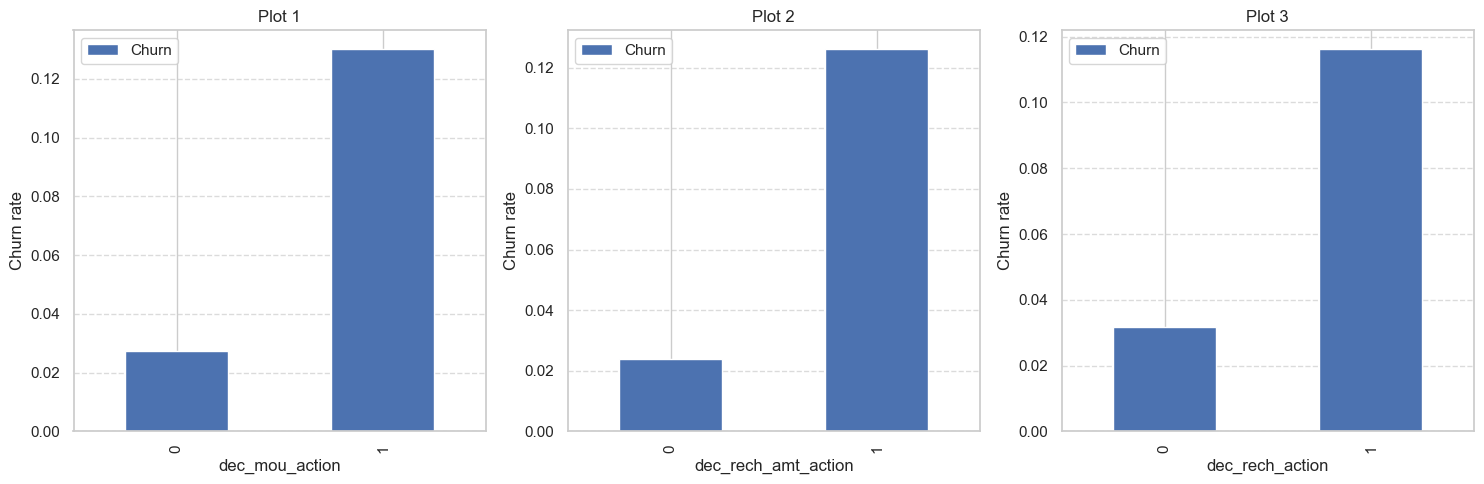

In [55]:
# Creating a figure with three subplots in a single row
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Plot 1 - Churn rate on the basis whether the customer decreased his/her mou (minutes of usage) in action month
new_df.pivot_table(values='Churn', index='dec_mou_action', aggfunc='mean').plot.bar(ax=axes[0])
axes[0].set_title('Plot 1')
axes[0].set_ylabel('Churn rate')
axes[0].grid(True, axis='y', linestyle='--', alpha=0.7)

# Plot 2 - Churn rate on the basis whether the customer decreased his/her amount of recharge in action month
new_df.pivot_table(values='Churn', index='dec_rech_amt_action', aggfunc='mean').plot.bar(ax=axes[1])
axes[1].set_title('Plot 2')
axes[1].set_ylabel('Churn rate')
axes[1].grid(True, axis='y', linestyle='--', alpha=0.7)

# Plot 3 - Churn rate on the basis whether the customer decreased his/her amount of recharge in action month
new_df.pivot_table(values='Churn', index='dec_rech_action', aggfunc='mean').plot.bar(ax=axes[2])
axes[2].set_title('Plot 3')
axes[2].set_ylabel('Churn rate')
axes[2].grid(True, axis='y', linestyle='--', alpha=0.7)

# Adjust layout to prevent overlapping
plt.tight_layout()

plt.show()

**Plot 1**
- We can see that the churn rate is more for the customers, whose minutes of usage (mou) decreased in the action phase compared to the good phase.

**Plot 2**
- Here also we see the same behaviour... The churn rate is more for the customers whose amount of recharge in the action phase is lesser than the amount in good phase.

**Plot 3**
- Here also we see the same behaviour... The churn rate is more for the customers whose amount of recharge in the action phase is lesser than the amount in good phase.

*From the above 3 plots we can observe that customers didn't do the monthly recharge more when they are in the action phase compared to the good phase.*

**Analysis of the minutes of usage MOU (churn and not churn) in the action phase**

In [56]:
# Creating churn dataframe
data_churn = new_df[new_df['Churn'] == 1]

# Creating not churn dataframe
data_not_churn = new_df[new_df['Churn'] == 0]

[Text(0.5, 0, 'Action phase MOU')]

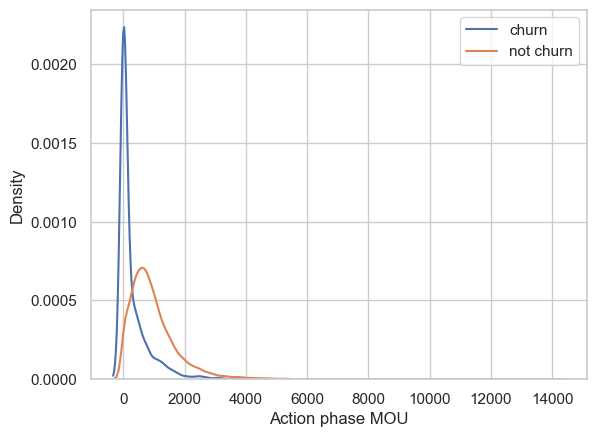

In [57]:
# Distribution plot
ax = sns.distplot(data_churn['total_mou_action'], label='churn', hist=False)
ax = sns.distplot(data_not_churn['total_mou_action'], label='not churn', hist=False)
plt.legend(loc = 'best')
ax.set(xlabel = 'Action phase MOU')

- Minutes of usage (MOU) of the churn customers is mostly populated on the 0 to 2000 range. Higher the MOU, lesser the churn probability.

**Bivariate Analysis**

Analyzing recharge amount and number of recharge in action month

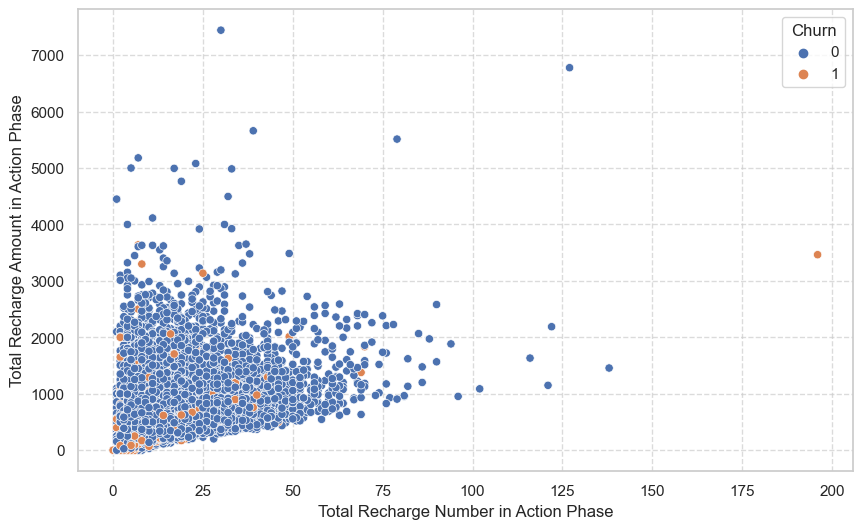

In [58]:
plt.figure(figsize = (10,6))
fig = sns.scatterplot(x = 'total_rech_num_8', y = 'total_rech_amt_8', hue = 'Churn', data = new_df)

# Add gridlines
plt.grid(True, linestyle='--', alpha=0.7)

# Rename the axis labels
fig.set(xlabel='Total Recharge Number in Action Phase', ylabel='Total Recharge Amount in Action Phase')

plt.show()

- Here, we can see from the above pattern that the recharge number and the recharge amount are almost propotional.
- Higher the number of recharge, Higher is the amount of the recharge

Analizing churn rate with respect to the decreasing recharge amount and number of recharge during the action phase

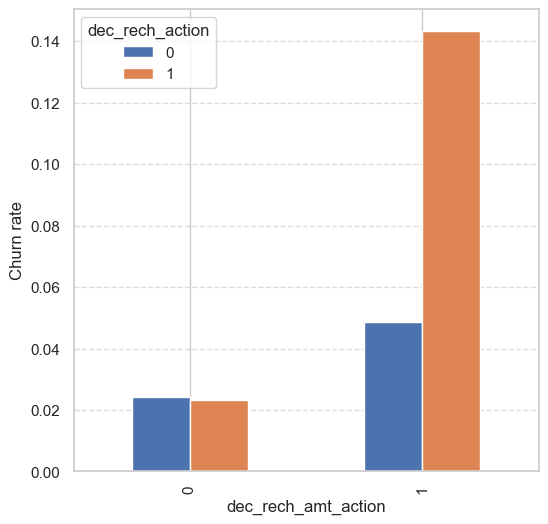

In [59]:
# Create a pivot table and plot a bar chart
pivot_table = new_df.pivot_table(values='Churn', index='dec_rech_amt_action', columns='dec_rech_action', aggfunc='mean')
ax = pivot_table.plot.bar(figsize=(6, 6))

# Add gridlines
ax.grid(True, axis='y', linestyle='--', alpha=0.7)

# Set ylabel
plt.ylabel('Churn rate')

plt.show()


- **We can see from the above plot, that the churn rate is higher for the customers, whose recharge amount as well as number of recharge have decreased in the action phase when compared to the good phase.**

In [60]:
# function to create Box Plot for month 6,7 and 8
def plot_box_chart(attribute):
    plt.figure(figsize=(20,16))
    df = new_df
    plt.subplot(2,3,1)
    sns.boxplot(data=df, y=attribute+"_6",x="Churn",hue="Churn",
                showfliers=False,palette=("plasma"))
    plt.subplot(2,3,2)
    sns.boxplot(data=df, y=attribute+"_7",x="Churn",hue="Churn",
                showfliers=False,palette=("plasma"))
    plt.subplot(2,3,3)
    sns.boxplot(data=df, y=attribute+"_8",x="Churn",hue="Churn",
                showfliers=False,palette=("plasma"))
    plt.show()

In [61]:
recharge_amnt_columns =  df.columns[df.columns.str.contains('rech_amt')]
recharge_amnt_columns.tolist()

['total_rech_amt_6',
 'total_rech_amt_7',
 'total_rech_amt_8',
 'max_rech_amt_6',
 'max_rech_amt_7',
 'max_rech_amt_8',
 'av_rech_amt_data_6',
 'av_rech_amt_data_7',
 'av_rech_amt_data_8']

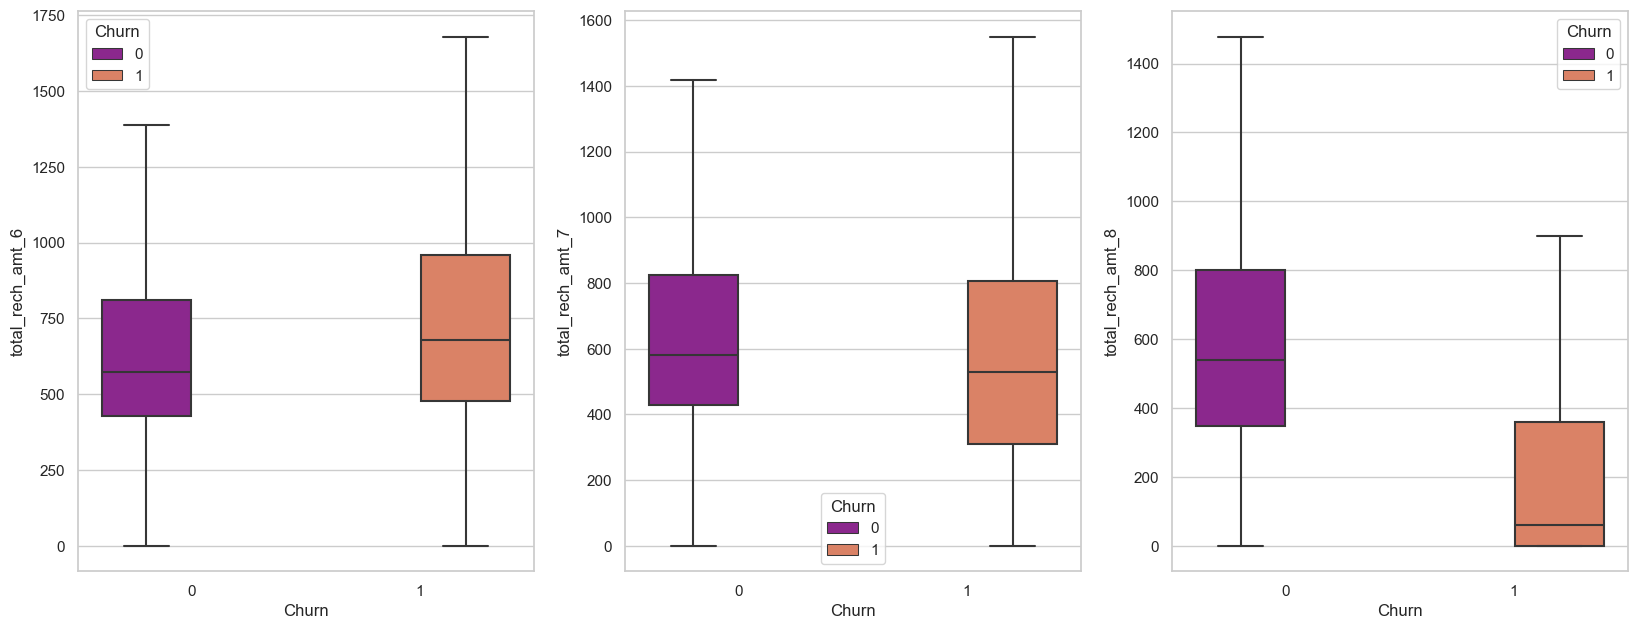

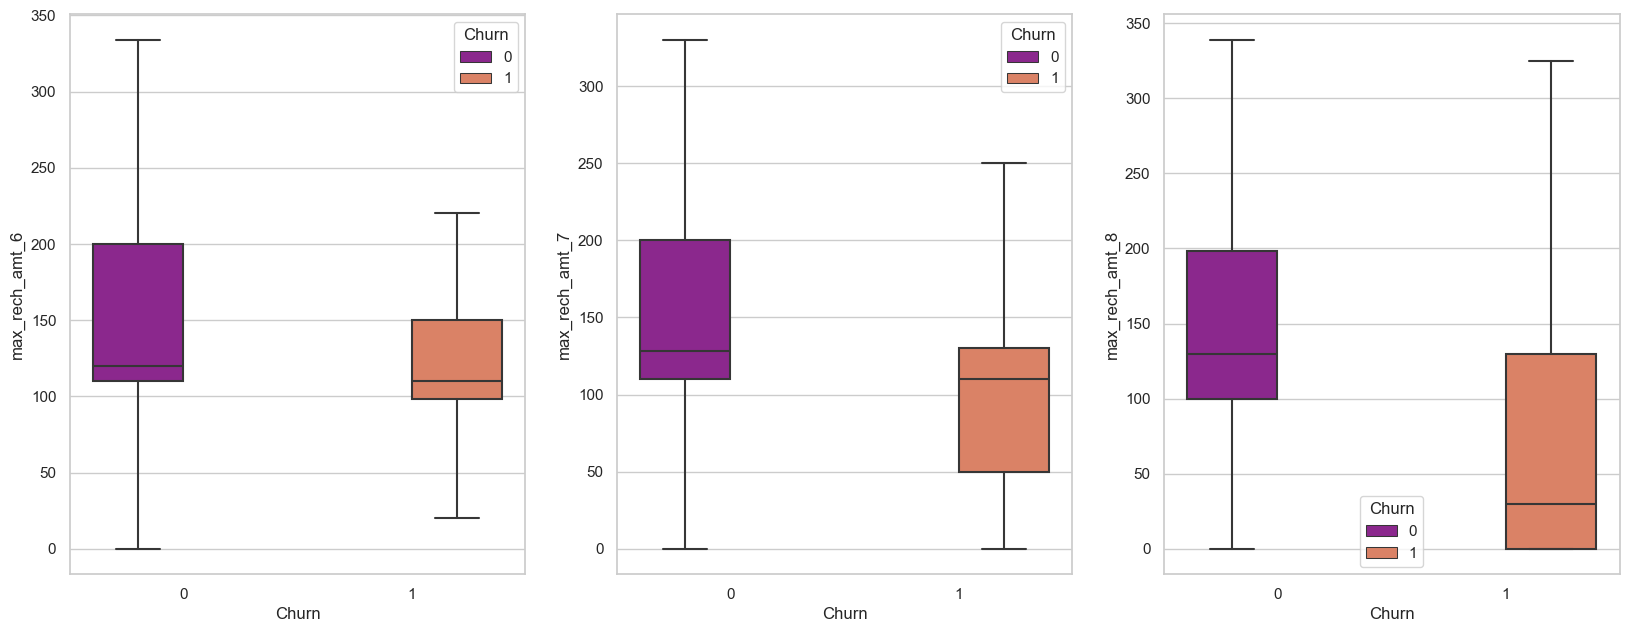

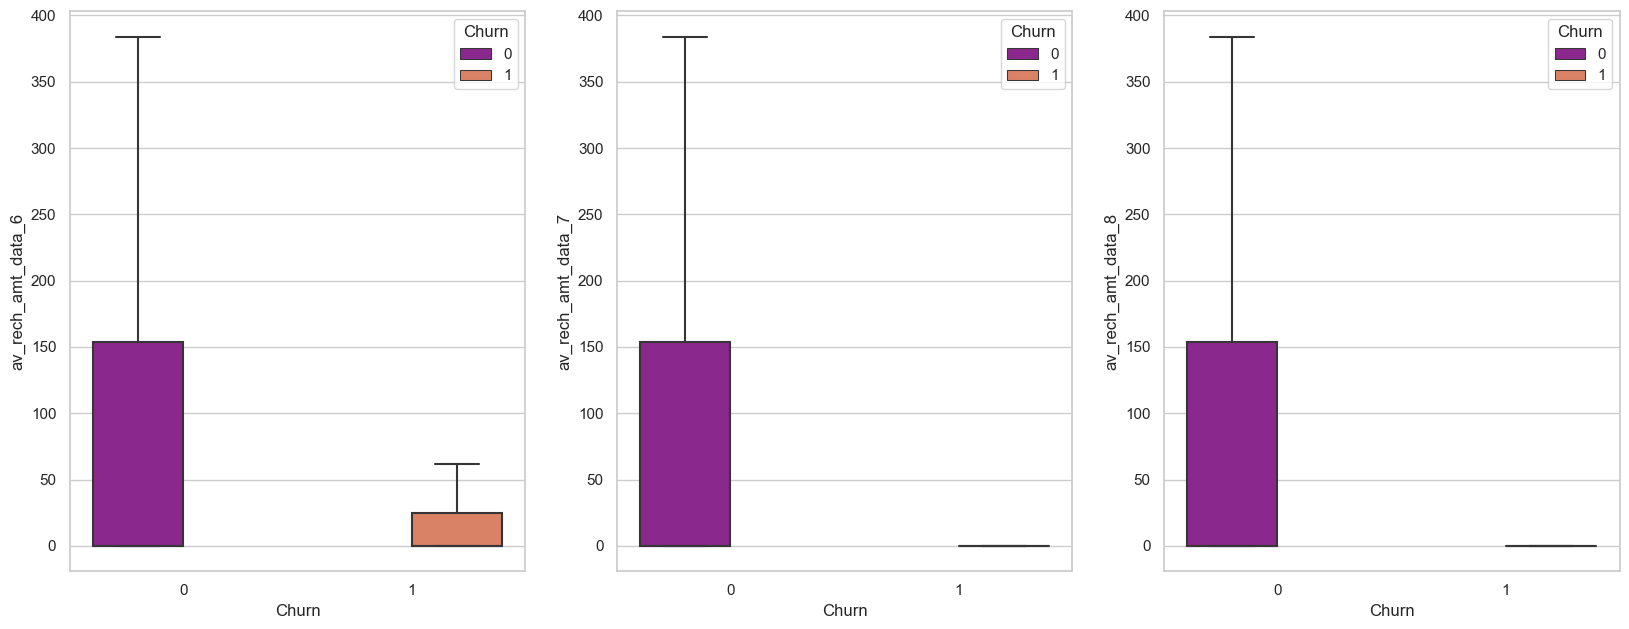

In [62]:
plot_box_chart('total_rech_amt')
plot_box_chart('max_rech_amt')
plot_box_chart('av_rech_amt_data')

- **From the above plots we can see clearly that the recharge amounts started to fall in the month 8 i.e near to the churn phase.**

In [63]:
# Now, dropping all the derived columns that are not needed further.

new_df = new_df.drop(['total_mou_action','avg_total_mou_good','diff_mou','avg_rech_num_good','diff_rech_num','avg_rech_amt_good',
                 'diff_rech_amt','avg_arpu_good','diff_arpu','avg_rech_6_7'], axis=1)

In [64]:
new_df.head(10)

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,Churn,dec_rech_action,dec_arpu_action,dec_rech_amt_action,dec_mou_action
7,"1,069.18","1,349.85","3,171.48",57.84,54.68,52.29,453.43,567.16,325.91,16.23,33.49,31.64,23.74,12.59,38.06,51.39,31.38,40.28,308.63,447.38,162.28,62.13,55.14,53.23,0.00,0.00,0.00,422.16,533.91,255.79,4.30,23.29,12.01,49.89,31.76,49.14,6.66,20.08,16.68,60.86,75.14,77.84,0.00,0.18,10.01,4.50,0.00,6.50,0.00,0.00,0.00,487.53,609.24,350.16,58.14,32.26,27.31,217.56,221.49,121.19,152.16,101.46,39.53,427.88,355.23,188.04,36.89,11.83,30.39,91.44,126.99,141.33,52.19,34.24,22.21,180.54,173.08,193.94,626.46,558.04,428.74,0.21,0.00,0.00,2.06,14.53,31.59,15.74,15.19,15.14,5.00,5.00,7.00,"1,580.00",790.00,"3,638.00","1,580.00",790.00,"1,580.00",0.00,0.00,779.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,802.00,57.74,19.38,18.74,1,0,0,0,1
8,378.72,492.22,137.36,413.69,351.03,35.08,94.66,80.63,136.48,0.00,0.00,0.00,0.00,0.00,0.00,297.13,217.59,12.49,80.96,70.58,50.54,0.00,0.00,0.00,0.00,0.00,7.15,378.09,288.18,63.04,116.56,133.43,22.58,13.69,10.04,75.69,0.00,0.00,0.00,130.26,143.48,98.28,0.00,0.00,0.00,0.00,0.00,10.23,0.00,0.00,0.00,508.36,431.66,171.56,23.84,9.84,0.31,57.58,13.98,15.48,0.00,0.00,0.00,81.43,23.83,15.79,0.00,0.58,0.10,22.43,4.08,0.65,0.00,0.00,0.00,22.43,4.66,0.75,103.86,28.49,16.54,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,19.00,21.00,14.00,437.00,601.00,120.00,90.00,154.00,30.00,50.00,0.00,10.00,0.00,2.00,3.00,0.00,154.00,23.00,0.00,177.00,69.00,0.00,356.00,0.03,0.00,750.95,11.94,0.00,1.00,0.00,0.00,1.00,3.00,0.00,0.00,0.00,0.00,0.00,0.00,315.00,21.03,910.65,122.16,0,1,1,1,1
13,492.85,205.67,593.26,501.76,108.39,534.24,413.31,119.28,482.46,23.53,144.24,72.11,7.98,35.26,1.44,49.63,6.19,36.01,151.13,47.28,294.46,4.54,0.00,23.51,0.00,0.00,0.49,205.31,53.48,353.99,446.41,85.98,498.23,255.36,52.94,156.94,0.00,0.00,0.00,701.78,138.93,655.18,0.00,0.00,1.29,0.00,0.00,4.78,0.00,0.00,0.00,907.09,192.41,"1,015.26",67.88,7.58,52.58,142.88,18.53,195.18,4.81,0.00,7.49,2

In [65]:
# plotting the distribution for recharge amount columns
col_rech = [col for col in new_df.columns if 'rech' in col]
col_rech

['total_rech_num_6',
 'total_rech_num_7',
 'total_rech_num_8',
 'total_rech_amt_6',
 'total_rech_amt_7',
 'total_rech_amt_8',
 'max_rech_amt_6',
 'max_rech_amt_7',
 'max_rech_amt_8',
 'total_rech_data_6',
 'total_rech_data_7',
 'total_rech_data_8',
 'max_rech_data_6',
 'max_rech_data_7',
 'max_rech_data_8',
 'av_rech_amt_data_6',
 'av_rech_amt_data_7',
 'av_rech_amt_data_8',
 'dec_rech_action',
 'dec_rech_amt_action']

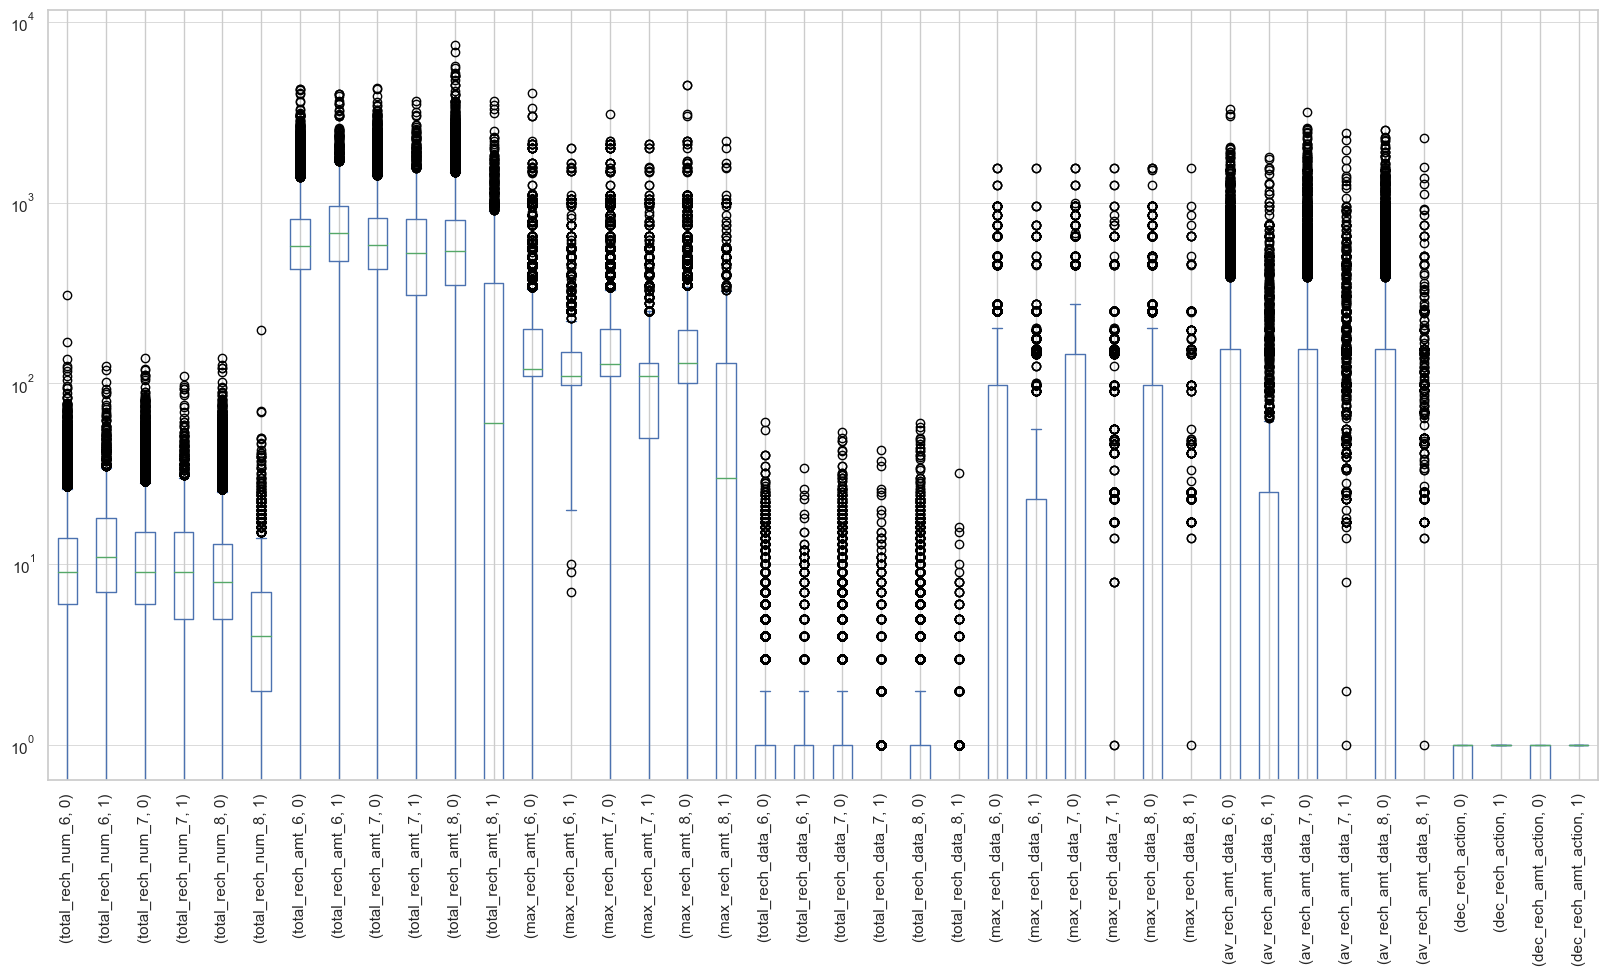

In [66]:
# Create a figure with a single subplot
fig, axes = plt.subplots(1, 1, squeeze = False, figsize = (20, 10))

# Access the single subplot in the 2D array axes
ax = axes[0][0]

# Create a box plot for the specified column(s) with 'Churn' as columns
new_df.pivot(columns = 'Churn')[col_rech].plot(kind = 'box', ax = ax)

# Rotate x-axis tick labels for better readability
ax.xaxis.set_tick_params(rotation = 90)

# Set y-axis scale to logarithmic
plt.yscale('log')

# Add white gridlines to y axis
ax.grid(True, axis = 'y', linestyle = '-', linewidth = 0.5)

# Display the plot
plt.show()

## Train Test Split

In [67]:
from sklearn.model_selection import train_test_split

# Putting feature variables into X
X = new_df.drop(['Churn'], axis = 1)

# Putting target variable to y
y = new_df.pop('Churn')

# Splitting data into train and test set 70:30
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.7, test_size = 0.3, random_state = 100, stratify = y)

In [68]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((20790, 137), (8910, 137), (20790,), (8910,))

**Dealing with Class Imbalance using SMOTE (Synthetic Minority Oversampling Technique)**

- We are creating synthetic samples by doing upsampling using SMOTE

In [69]:
# Imporing SMOTE
import imblearn
from imblearn.over_sampling import SMOTE

# Instantiating SMOTE
smt = SMOTE(random_state = 42)

# Fittign SMOTE to the train set
X_train, y_train = smt.fit_resample(X_train, y_train)

In [70]:
!pip install imblearn

In [71]:
X_train.shape

(38004, 137)

### **Scaling numeric features**

During EDA we have observed few outliers in numeric features. So, using Robust Scaling using median and quantile values instead of Standard Scaling using mean and standard deviation.

In [72]:
# Standardization method
from sklearn.preprocessing import StandardScaler

# Instantiate the Scaler
scaler = StandardScaler()

In [73]:
X_train.head()

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,dec_rech_action,dec_arpu_action,dec_rech_amt_action,dec_mou_action
0,"1,409.37","1,052.63","1,674.24",453.28,343.38,589.58,826.99,811.99,815.96,70.83,39.78,121.14,116.76,69.06,228.88,415.74,313.88,457.94,556.73,635.79,627.58,0.00,0.81,2.50,0.00,0.00,0.00,972.48,950.49,"1,088.03",4.68,3.38,1.28,184.41,132.43,86.66,0.00,0.00,0.68,189.09,135.81,88.63,0.00,0.00,0.00,1.93,0.00,0.00,0.00,0.00,0.00,"1,163.51","1,086.31","1,176.66",268.74,346.29,291.99,768.03,733.01,470.96,18.14,11.83,1.44,"1,054.93","1,091.14",764.41,5.59,2.03,0.00,36.28,61.58,55.23,3.15,0.00,5.65,45.03,63.61,60.88,"1,099.96","1,154.76",831.43,0.00,0.00,0.00,0.00,0.00,6.13,0.00,0.00,0.00,14.00,10.00,13.00,"1,760.00","1,048.00","1,970.00",250.00,250.00,250.00,0.00,200.00,130.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,"1,791.00",0.00,0.00,0.00,0,0,0,1
1,388.90,533.34,675.71,13.28,11.94,48.51,201.43,230.93,277.83,0.00,0.00,0.00,0.00,0.00,0.00,7.16,8.86,30.91,188.41,219.04,245.49,10.01,0.36,11.81,0.15,0.00,0.00,205.59,228.28,288.23,6.11,3.08,17.59,2.85,6.49,16.98,0.00,0.00,3.53,8.96,9.58,38.11,0.00,0.00,0.00,0.15,5.01,0.00,0.00,0.00,0.00,214.71,242.88,326.34,7.04,5.38,11.56,183.64,600.43,251.44,24.83,71.06,29.36,215.53,676.88,292.38,3.24,4.06,7.86,0.85,4.45,8.91,0.00,0.00,2.31,4.09,8.51,19.09,219.76,685.39,311.48,0.00,0.00,0.00,0.13,0.00,0.00,0.00,0.00,0.00,2.00,6.00,4.00,379.00,532.00,"1,034.00",379.00,250.00,400.00,0.00,27.00,350.00,0.00,1.00,1.00,0.00,145.00,154.00,0.00,145.00,154.00,0.00,1.84,3.87,0.00,478.99,127.33,0.00,0.00,1.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,"2,372.00",38.22,114.06,236.82,0,0,0,1
2,19.42,597.25,709.65,3.68,"1,031.28","1,018.29",24.89,927.86,"1,043.43",0.00,0.00,0.00,0.00,0.00,0.00,0.05,3.18,3.24,1.03,16.59,7.04,0.00,0.00,0.00,5.46,0.00,0.00,1.08,19.78,10.29,3.63,"1,028.09","1,015.04",18.39,907.38,"1,028.61",0.00,0.00,0.00,22.03,"1,935.48","2,043.66",0.00,0.00,0.00,5.46,6.21,8.86,0.00,0.00,0.00,28.58,"1,961.48","2,062.83",6.39,1.48,11.64,1

**Scaling the Train dataset**

In [74]:
# List of the numeric columns
cols_scale = X_train.columns.to_list()
print("Total scalable columns: ", len(cols_scale))
# Removing the derived binary columns
binary_cols_to_remove=['dec_mou_action','dec_rech_action','dec_rech_amt_action','dec_arpu_action']
for col in binary_cols_to_remove:
    cols_scale.remove(col)

print("Scalable cols after removing : ", len(cols_scale))

Total scalable columns:  137
Scalable cols after removing :  133


In [75]:
# Fit the data into scaler and transform
X_train[cols_scale] = scaler.fit_transform(X_train[cols_scale])

In [76]:
X_train.head()

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,dec_rech_action,dec_arpu_action,dec_rech_amt_action,dec_mou_action
0,2.42,1.62,3.55,0.23,0.11,1.02,0.81,0.89,1.40,0.52,0.29,1.41,0.66,0.38,1.98,1.56,1.16,2.24,1.92,2.47,2.81,-0.31,-0.24,-0.09,-0.22,-0.20,-0.21,2.22,2.31,3.15,-0.53,-0.50,-0.37,-0.16,-0.22,-0.13,-0.15,-0.14,-0.04,-0.48,-0.50,-0.34,-0.12,-0.11,-0.07,-0.25,-0.36,-0.26,-0.36,-0.02,-0.01,0.62,0.65,1.27,1.65,2.02,2.09,2.99,3.07,2.14,0.19,0.01,-0.23,2.98,3.17,2.46,-0.17,-0.20,-0.20,0.04,0.34,0.42,0.06,-0.14,0.29,-0.05,0.14,0.27,2.53,2.76,2.16,-0.36,-0.14,-0.16,-0.18,-0.16,-0.03,-0.09,-0.09,-0.08,0.09,-0.17,0.60,2.66,1.07,3.53,0.60,0.56,0.93,-0.78,0.88,0.59,-0.41,-0.40,-0.36,-0.48,-0.46,-0.41,-0.45,-0.44,-0.38,-0.26,-0.24,-0.20,-0.29,-0.29,-0.25,-0.29,-0.28,-0.24,-0.29,-0.29,-0.28,-0.29,-0.29,-0.24,-0.16,-0.15,-0.12,0.80,-0.27,-0.29,-0.29,0,0,0,1
1,-0.60,0.02,0.82,-0.66,-0.62,-0.37,-0.48,-0.35,0.05,-0.22,-0.24,-0.24,-0.28,-0.30,-0.29,-0.33,-0.30,-0.13,0.20,0.42,0.77,0.32,-0.27,0.54,-0.20,-0.20,-0.21,-0.07,0.06,0.43,-0.52,-0.50,-0.32,-0.56,-0.51,-0.34,-0.15,-0.14,0.28,-0.76,-0.71,-0.43,-0.12,-0.11,-0.07,-0.35,-0.11,-0.26,-0.36,-0.02,-0.01,-0.78,-0.64,-0.17,-0.38,-0.34,-0.25,0.23,2.40,0.89,0.37,1.53,0.62,0.05,1.72,0.58,-0.21,-0.17,-0.04,-0.33,-0.26,-0.14,-0.14,-0.14,0.05,-0.37,-0.30,-0.12,-0.14,1.33,0.42,-0.36,-0.14,-0.16,-0.17,-0.16,-0.13,-0.09,-0.09,-0.08,-1.13,-0.61,-0.47,-0.80,-0.22,1.39,1.45,0.56,1.99,-0.78,-0.49,2.53,-0.41,0.07,0.18,-0.48,1.01,1.42,-0.45,0.42,0.69,-0.26,-0.24,-0.18,-0.29,0.39,-0.05,-0.29,-0.28,3.36,-0.29,-0.29,-0.28,-0.29,1.78,-0.24,-0.16,-0.15,-0.12,1.45,-0.14,0.05,0.44,0,0,0,1
2,-1.69,0.21,0.91,-0.68,1.61,2.13,-0.85,1.14,1.97,-0.22,-0.24,-0.24,-0.28,-0.30,-0.29,-0.36,-0.32,-0.28,-0.67,-0.58,-0.51,-0.31,-0.29,-0.27,0.49,-0.20,-0.21,-0.68,-0.59,-0.51,-0.53,1.96,2.62,-0.53,1.55,2.67,-0.15,-0.14,-0.12,-0.74,2.43,3.51,-0.12,-0.11,-0.07,-0.05,-0.05,0.21,-0.36,-0.02,-0.01,-1.05,1.99,2.76,-0.39,-0.36,-0.25,-0.58,-0.58,-0.41,-0.31,-0.30,-0.27,-0.64,-0.63,-0.44,-0.25,-0.23,-0.20,-0.18,0.35,-0.18,-0.14,-0.14,-0.11,-0.28,0.13,-0.24,-0.70,-0.53,-0.49,-0.36,

**Scaling the TEST DATA set**

We do not fit scaler on the TEST data set. We can only transform TEST set.

In [77]:
# Transform the test set
X_test[cols_scale] = scaler.transform(X_test[cols_scale])
X_test.head()

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,dec_rech_action,dec_arpu_action,dec_rech_amt_action,dec_mou_action
2722,0.15,0.43,1.03,1.98,2.60,3.37,-0.37,-0.40,-0.22,-0.22,-0.24,-0.24,-0.28,-0.29,-0.29,0.10,-0.18,0.21,-0.05,-0.03,-0.18,-0.28,-0.29,-0.19,-0.22,-0.20,-0.21,0.02,-0.15,0.01,2.11,2.98,3.77,-0.30,-0.35,-0.09,-0.15,-0.14,-0.12,1.27,1.76,2.46,-0.12,-0.11,-0.07,-0.29,-0.12,-0.06,0.15,-0.02,-0.01,1.22,1.57,2.11,0.23,0.12,0.67,-0.43,0.03,-0.34,-0.28,-0.30,-0.23,-0.25,0.04,0.05,0.09,0.58,0.08,0.10,-0.09,-0.04,-0.14,-0.14,-0.11,0.10,0.20,-0.01,-0.19,0.10,0.01,-0.36,-0.14,-0.16,-0.06,-0.07,-0.12,-0.09,-0.09,-0.08,-0.52,-0.39,0.13,0.35,0.57,1.18,-0.25,-0.17,0.22,0.18,0.31,0.76,-0.41,-0.40,-0.36,-0.48,-0.46,-0.41,-0.45,-0.44,-0.38,-0.26,-0.24,-0.20,-0.29,-0.29,-0.25,-0.29,-0.28,-0.24,-0.29,-0.29,-0.28,-0.29,-0.29,-0.24,-0.16,-0.15,-0.12,-0.70,-0.27,-0.29,-0.29,0,0,0,1
28720,-0.90,-0.54,0.87,-0.63,-0.49,-0.23,-0.54,-0.39,-0.13,-0.22,-0.24,-0.24,-0.28,-0.30,-0.29,-0.24,-0.01,0.28,0.12,0.35,0.51,-0.10,-0.29,-0.25,-0.22,-0.20,-0.21,-0.08,0.20,0.48,-0.54,-0.51,-0.38,-0.56,-0.52,-0.36,-0.15,0.03,-0.08,-0.77,-0.71,-0.49,-0.12,-0.11,-0.07,-0.36,-0.36,-0.26,-0.36,-0.02,-0.01,-0.79,-0.58,-0.19,-0.25,0.04,0.84,0.70,0.84,1.27,-0.31,-0.30,-0.27,0.36,0.57,1.25,-0.26,-0.23,-0.20,-0.29,-0.27,-0.20,-0.14,-0.14,-0.03,-0.37,-0.34,-0.25,0.14,0.32,0.93,-0.36,-0.14,-0.16,-0.18,-0.16,-0.13,-0.09,-0.09,-0.08,0.09,0.69,0.84,-0.94,-0.50,0.86,-0.84,-0.76,1.46,-0.54,-0.47,-0.30,3.09,3.82,2.85,-0.22,-0.20,1.31,0.63,0.81,0.45,2.34,-0.01,-0.18,-0.29,1.90,1.89,-0.29,-0.28,-0.24,4.25,0.90,0.42,-0.29,-0.29,2.06,-0.16,8.07,5.19,1.88,1.39,-0.09,-0.29,1,0,0,0
43175,0.44,0.09,0.55,1.77,2.28,2.71,-0.67,-0.57,-0.35,-0.22,-0.24,-0.24,-0.28,-0.30,-0.29,-0.19,-0.28,-0.24,-0.52,-0.60,-0.38,-0.24,-0.18,-0.27,-0.22,-0.20,-0.21,-0.47,-0.57,-0.40,2.03,2.67,3.26,-0.40,-0.33,-0.15,-0.15,-0.14,-0.12,1.14,1.57,2.07,-0.12,-0.11,-0.07,-0.06,1.51,0.27,3.35,-0.02,-0.01,0.87,1.24,1.59,0.17,-0.02,0.58,-0.33,-0.38,-0.10,1.08,0.82,0.80,-0.03,-0.16,0.31,-0.12,0.29,0.31,-0.33,-0.30,-0.24,-0.07,-0.12,-0.11,-0.32,-0.10,-0.06,-0.18,

-------------

## Model Building with Principal Component Analysis (PCA)

In [78]:
#Import PCA
from sklearn.decomposition import PCA

# Instantiate PCA
pca = PCA(svd_solver='randomized', random_state=100)

# Fit train set on PCA
pca.fit(X_train)

PCA(random_state=100, svd_solver='randomized')

In [79]:
# Looking at the Principal components
pca.components_

array([[ 3.52773478e-02,  1.11044216e-01,  1.55950795e-01, ...,
        -3.51403768e-02, -3.61121643e-02, -3.22429719e-02],
       [ 6.25167324e-02,  1.17114219e-01,  1.04095214e-01, ...,
        -1.50823096e-02, -1.74238557e-02, -1.60926392e-03],
       [ 5.93571696e-02,  1.59663868e-01,  1.43217003e-01, ...,
        -2.70601302e-02, -2.91858514e-02, -2.83518191e-02],
       ...,
       [-5.86950567e-16,  7.05796242e-16, -5.92519099e-16, ...,
         1.04134031e-16, -4.11581452e-16,  1.12678230e-15],
       [ 0.00000000e+00,  1.12517803e-15, -6.43446851e-16, ...,
        -1.99851010e-16, -8.80043690e-16, -5.67000848e-16],
       [-0.00000000e+00,  4.00544483e-16, -4.02547678e-16, ...,
         2.96380595e-16,  3.87177104e-16,  5.63029977e-16]])

In [80]:
# Cumuliative varinace of the principal components.
variance_cumu = np.round(np.cumsum(pca.explained_variance_ratio_)*100, decimals=4)
print(variance_cumu)

[ 10.4334  18.7049  25.0742  29.3166  33.4026  37.0968  40.4122  43.1709
  45.5947  47.9836  50.1068  52.1933  54.263   56.2261  58.0323  59.7416
  61.4148  62.878   64.2727  65.6344  66.914   68.1257  69.3083  70.4045
  71.4724  72.4707  73.4452  74.3459  75.2363  76.1016  76.914   77.709
  78.4772  79.2288  79.9673  80.699   81.4077  82.0915  82.7498  83.4023
  84.0264  84.6189  85.1709  85.6879  86.1991  86.6923  87.1706  87.6093
  88.0438  88.4614  88.8657  89.2666  89.6483  90.0232  90.3936  90.756
  91.1071  91.4483  91.783   92.1126  92.4364  92.7365  93.0239  93.3069
  93.572   93.8316  94.0813  94.3252  94.5682  94.8042  95.0378  95.2673
  95.4902  95.7056  95.917   96.1254  96.328   96.5267  96.7232  96.916
  97.1028  97.2763  97.4494  97.6171  97.782   97.9443  98.099   98.2422
  98.3781  98.5106  98.6402  98.7687  98.8902  99.0057  99.1158  99.2092
  99.3013  99.3887  99.4721  99.5471  99.6192  99.6851  99.7477  99.8017
  99.8424  99.8828  99.9196  99.9518  99.9747  99.99  

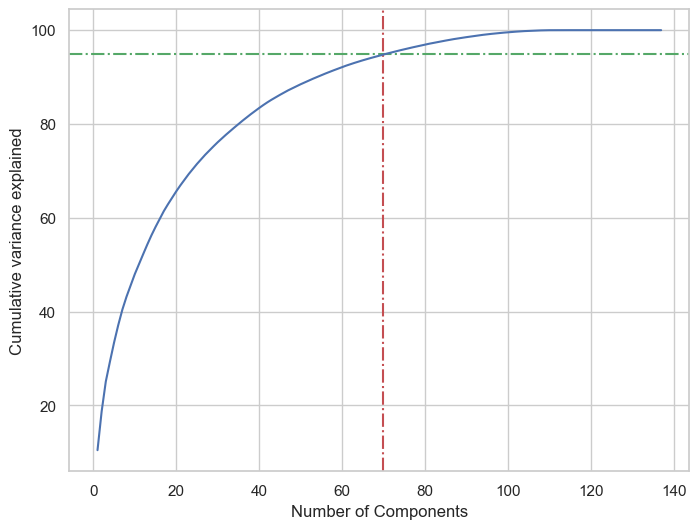

In [81]:
# Plotting scree plot
fig = plt.figure(figsize=[8,6])
plt.axhline(y=95, color='g', linestyle='-.')
plt.axvline(x=70, color='r', linestyle='-.')
plt.plot(range(1, len(pca.explained_variance_ratio_)+1),variance_cumu)
plt.xlabel('Number of Components')
plt.ylabel("Cumulative variance explained")

plt.show()

- It looks like 70 components are enough to describe 95% of the variance in the dataset.
- We'll choose 70 components for our modeling.

**Using incremental PCA for better efficiency**

In [82]:
from sklearn.decomposition import IncrementalPCA
pca_final = IncrementalPCA(n_components = 70)

X_train_pca = pca_final.fit_transform(X_train)

In [83]:
print("Size of earlier dataset was :",X_train.shape)
print("Size of dataset after PCA is:", X_train_pca.shape)

Size of earlier dataset was : (38004, 137)
Size of dataset after PCA is: (38004, 70)


In [84]:
#creating correlation matrix for the given data
corrmat = np.corrcoef(X_train_pca.transpose())

#Make a diagonal matrix with diagonal entry of Matrix corrmat
p = np.diagflat(corrmat.diagonal())

# subtract diagonal entries making all diagonals 0
corrmat_diag_zero = corrmat - p
print("max positive corr:",round(corrmat_diag_zero.max(),3), ", min negative corr: ", round(corrmat_diag_zero.min(),3))

max positive corr: 0.017 , min negative corr:  -0.017


- **We can see from the above calculations that the correlation among the attributes is almost 0, we can proceed with these principal components.**

**Applying transformation on the test set**


- We are only doing Transform in the test set not the Fit-Transform.
- Because the Fitting is already done on the train set.
- So, we just have to do the transformation with the already fitted data on the train set.

In [85]:
X_test_pca = pca_final.transform(X_test)
X_test_pca.shape

(8910, 70)

---------------------------------------------------------------------------------------

## Model Building

Using this PCA transformed dataset, we will build models to predict customer churn

### 1. Logistic Regression with PCA

In [86]:
# Importing scikit logistic regression module
from sklearn.linear_model import LogisticRegression

# Impoting metrics
from sklearn import metrics
from sklearn.metrics import confusion_matrix

In [87]:
# default solver is very slow so changed to 'lbfgs'
logreg = LogisticRegression(solver = 'lbfgs',class_weight="balanced")

In [88]:
# Training the model on the data
logreg.fit(X_train_pca, y_train)

LogisticRegression(class_weight='balanced')

In [89]:
# prediction on test data
y_pred = logreg.predict(X_test_pca)

# create confusion matrix
cm = confusion_matrix(y_test,y_pred)
print("confusoin matrix \t\n",cm)

# checking sesitivity
print("sensitivity \t", (cm[1,1]/(cm[1,0]+cm[1,1])).round(2))

# checking  specificity
print("specificity \t", (cm[0,0]/(cm[0,0]+cm[0,1])).round(2))

# check area under the curve
from sklearn.metrics import roc_auc_score
print("area under the curve \t",round(roc_auc_score(y_test,y_pred),2))

confusoin matrix 	
 [[6656 1487]
 [ 140  627]]
sensitivity 	 0.82
specificity 	 0.82
area under the curve 	 0.82


**Tuning hyperparameter C**

C is the the inverse of regularization strength in Logistic Regression. Higher values of C correspond to less regularization.

In [90]:
# Importing libraries for cross validation
from sklearn.model_selection import KFold, StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

In [91]:
# Creating StratifiedKFold object with 5 splits
folds = StratifiedKFold(n_splits=5, shuffle=True, random_state=4)

# Specify params
params = {"C": [0.01, 0.1, 1, 10, 100, 1000]}

# GridSearch
model_cv = GridSearchCV(estimator = LogisticRegression(),
                        param_grid = params,
                        scoring= 'roc_auc',
                        cv = folds,
                        verbose = 1,
                        return_train_score=True)

# Fit the model
model_cv.fit(X_train_pca, y_train)

Fitting 5 folds for each of 6 candidates, totalling 30 fits


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=4, shuffle=True),
             estimator=LogisticRegression(),
             param_grid={'C': [0.01, 0.1, 1, 10, 100, 1000]},
             return_train_score=True, scoring='roc_auc', verbose=1)

In [92]:
# results of grid search CV
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.14,0.01,0.00,0.00,0.01,{'C': 0.01},0.90,0.91,0.91,0.90,0.91,0.91,0.00,6,0.91,0.91,0.91,0.91,0.91,0.91,0.00
1,0.20,0.03,0.00,0.00,0.10,{'C': 0.1},0.90,0.91,0.91,0.90,0.91,0.91,0.00,4,0.91,0.91,0.91,0.91,0.91,0.91,0.00
2,0.21,0.04,0.00,0.00,1,{'C': 1},0.90,0.91,0.91,0.90,0.91,0.91,0.00,5,0.91,0.91,0.91,0.91,0.91,0.91,0.00
3,0.20,0.03,0.00,0.00,10,{'C': 10},0.90,0.91,0.91,0.90,0.91,0.91,0.00,1,0.91,0.91,0.91,0.91,0.91,0.91,0.00
4,0.21,0.03,0.00,0.00,100,{'C': 100},0.90,0.91,0.91,0.90,0.91,0.91,0.00,2,0.91,0.91,0.91,0.91,0.91,0.91,0.00
5,0.23,0.04,0.00,0.00,1000,{'C': 1000},0.90,0.91,0.91,0.90,0.91,0.91,0.00,3,0.91,0.91,0.91,0.91,0.91,0.91,0.00


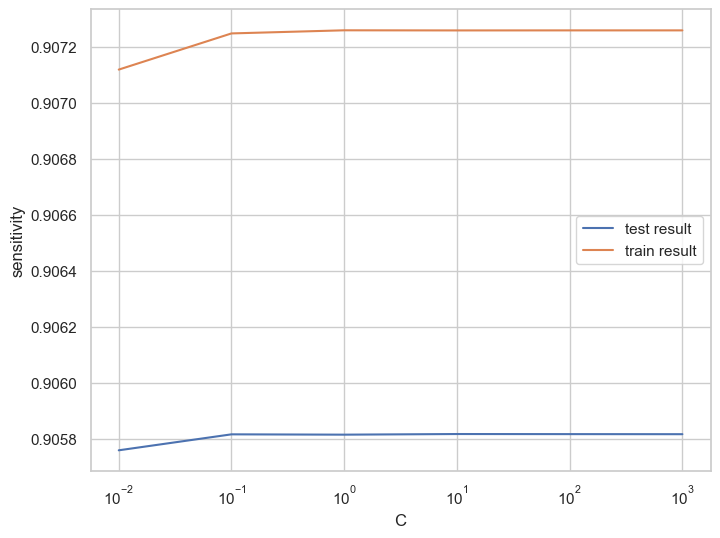

In [93]:
 # plotting C versus train and validation scores

plt.figure(figsize=(8, 6))
plt.plot(cv_results['param_C'], cv_results['mean_test_score'])
plt.plot(cv_results['param_C'], cv_results['mean_train_score'])
plt.xlabel('C')
plt.ylabel('sensitivity')
plt.legend(['test result', 'train result'], loc='best')
plt.xscale('log')

In [94]:
# Best score with best C
best_score = model_cv.best_score_
best_C = model_cv.best_params_['C']

print(" The highest test sensitivity is {0} at C = {1}".format(best_score, best_C))

 The highest test sensitivity is 0.9058182595519039 at C = 10


**Model with optimum parameters**

In [95]:
# Instantiate the model with best C
logistic_pca = LogisticRegression(C=best_C)

# Fit the model on the train set
log_pca_model = logistic_pca.fit(X_train_pca, y_train)

In [96]:
# Predictions on the train set
y_train_pred = log_pca_model.predict(X_train_pca)

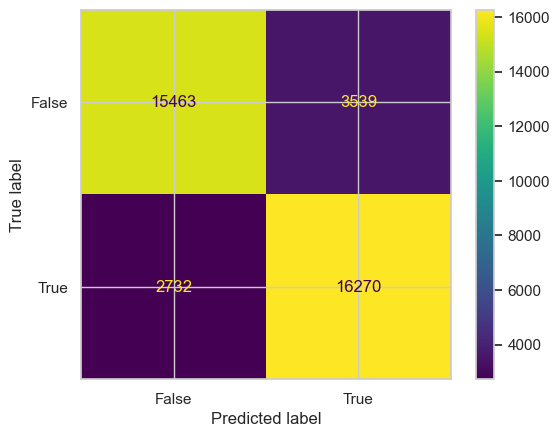

In [97]:
#Confusion Matrix.

actual = np.random.binomial(1,.9,size = 1000)
predicted = np.random.binomial(1,.9,size = 1000)

confusion_matrix = metrics.confusion_matrix(y_train, y_train_pred)
confusion_matrix

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])
cm_display.plot()

In [98]:
TP = confusion_matrix[1,1] # true positive
TN = confusion_matrix[0,0] # true negatives
FP = confusion_matrix[0,1] # false positives
FN = confusion_matrix[1,0] # false negatives

In [99]:
# Accuracy
print("Accuracy:-",metrics.accuracy_score(y_train, y_train_pred))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))

# Recall
print("Recall:-" , TP/float(TP+FN))

# check area under curve
y_pred_prob = log_pca_model.predict_proba(X_train_pca)[:, 1]
print("AUC:    \t", round(roc_auc_score(y_train, y_pred_prob),2))

Accuracy:- 0.834991053573308
Sensitivity:- 0.856225660456794
Specificity:- 0.8137564466898222
Recall:- 0.856225660456794
AUC:    	 0.91


**Prediction on the test set**

In [100]:
# Prediction on the test set
y_test_pred = log_pca_model.predict(X_test_pca)

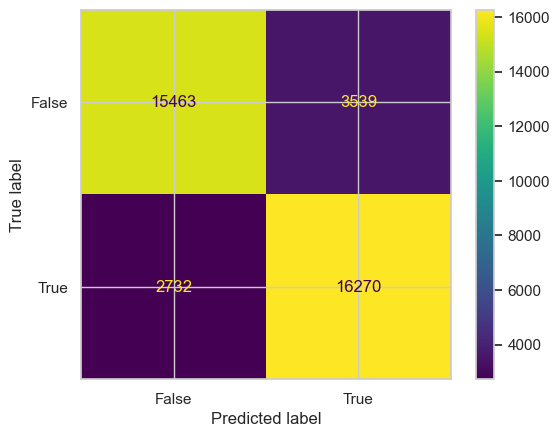

In [101]:
# Confusion matrix
actual = np.random.binomial(1,.9,size = 1000)
predicted = np.random.binomial(1,.9,size = 1000)

confusion = metrics.confusion_matrix(y_test, y_test_pred)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])
cm_display.plot()

In [102]:
# Accuracy
print("Accuracy:-    \t",round(metrics.accuracy_score(y_test, y_test_pred),2))

# Sensitivity
print("Sensitivity:-  \t",round(TP / float(TP+FN),2))

# Specificity
print("Specificity:-  \t", round(TN / float(TN+FP),2))

# Recall
print("Recall:-    \t" , round(TP/float(TP+FN),2))

# check area under curve
y_pred_prob = log_pca_model.predict_proba(X_test_pca)[:, 1]
print("AUC:-    \t", round(roc_auc_score(y_test, y_pred_prob),2))

Accuracy:-    	 0.82
Sensitivity:-  	 0.86
Specificity:-  	 0.81
Recall:-    	 0.86
AUC:-    	 0.89


**Overall we can see that the model is performing well in the TEST set, as per what it has learned from the TRAIN set.**

----------------------------------

### 2. Decision Tree with PCA

In [103]:
# Importing decision tree classifier
from sklearn.tree import DecisionTreeClassifier

**Hyperparameter Tuning**

In [104]:
# Create the parameter grid
param_grid = {
    'max_depth': range(5, 15, 5),
    'min_samples_leaf': range(50, 150, 50),
    'min_samples_split': range(50, 150, 50),
}


# Instantiate the grid search model for best results.
dtree = DecisionTreeClassifier()

grid_search = GridSearchCV(estimator = dtree,
                           param_grid = param_grid,
                           scoring= 'recall',
                           cv = 5,
                           verbose = 1)

# Fit the grid search to the data
grid_search.fit(X_train_pca,y_train)

Fitting 5 folds for each of 8 candidates, totalling 40 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': range(5, 15, 5),
                         'min_samples_leaf': range(50, 150, 50),
                         'min_samples_split': range(50, 150, 50)},
             scoring='recall', verbose=1)

In [105]:
# cv results
cv_results = pd.DataFrame(grid_search.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_min_samples_leaf,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,1.44,0.02,0.01,0.00,5,50,50,"{'max_depth': 5, 'min_samples_leaf': 50, 'min_samples_split': 50}",0.80,0.83,0.80,0.82,0.82,0.81,0.01,5
1,1.43,0.02,0.01,0.00,5,50,100,"{'max_depth': 5, 'min_samples_leaf': 50, 'min_samples_split': 100}",0.80,0.83,0.80,0.82,0.82,0.81,0.01,5
2,1.41,0.01,0.01,0.00,5,100,50,"{'max_depth': 5, 'min_samples_leaf': 100, 'min_samples_split': 50}",0.79,0.82,0.80,0.82,0.82,0.81,0.02,7
3,1.46,0.03,0.01,0.00,5,100,100,"{'max_depth': 5, 'min_samples_leaf': 100, 'min_samples_split': 100}",0.79,0.82,0.80,0.82,0.82,0.81,0.02,7
4,2.61,0.06,0.01,0.00,10,50,50,"{'max_depth': 10, 'min_samples_leaf': 50, 'min_samples_split': 50}",0.85,0.86,0.84,0.86,0.85,0.85,0.01,1
5,2.64,0.11,0.01,0.00,10,50,100,"{'max_depth': 10, 'min_samples_leaf': 50, 'min_samples_split': 100}",0.85,0.86,0.84,0.86,0.85,0.85,0.01,2
6,2.27,0.05,0.01,0.00,10,100,50,"{'max_depth': 10, 'min_samples_leaf': 100, 'min_samples_split': 50}",0.80,0.82,0.82,0.83,0.82,0.82,0.01,3
7,2.23,0.01,0.01,0.00,10,100,100,"{'max_depth': 10, 'min_samples_leaf': 100, 'min_samples_split': 100}",0.79,0.82,0.82,0.83,0.82,0.82,0.01,4


In [106]:
# Printing the optimal sensitivity score and hyperparameters
print("Best sensitivity:-", grid_search.best_score_)
print(grid_search.best_estimator_)

Best sensitivity:- 0.8503844556141734
DecisionTreeClassifier(max_depth=10, min_samples_leaf=50, min_samples_split=50)


**Model with the optimal hyperparameters**

In [107]:
# Model with optimal hyperparameters
dt_pca_model = DecisionTreeClassifier(criterion = "gini",
                                  random_state = 100,
                                  max_depth=10,
                                  min_samples_leaf=50,
                                  min_samples_split=10)

dt_pca_model.fit(X_train_pca, y_train)

DecisionTreeClassifier(max_depth=10, min_samples_leaf=50, min_samples_split=10,
                       random_state=100)

**Prediction on the train set**

In [108]:
# Predictions on the train set
y_train_pred = dt_pca_model.predict(X_train_pca)


# Creating Confusion matrix

confusion=metrics.confusion_matrix(y_train, y_train_pred)
confusion

array([[16550,  2452],
       [ 2576, 16426]], dtype=int64)

In [109]:
TP = confusion[1,1] # true positive
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [110]:
# Accuracy
print("Accuracy:-",round(metrics.accuracy_score(y_train, y_train_pred),2))

# Sensitivity
print("Sensitivity:-",round(TP / float(TP+FN),2))

# Specificity
print("Specificity:-", round(TN / float(TN+FP),2))

# Recall
print("Recall:-" , round(TP/float(TP+FN),2))

# AUC
print("Area under curve is:", round(metrics.roc_auc_score(y_train, y_train_pred),2))

Accuracy:- 0.87
Sensitivity:- 0.86
Specificity:- 0.87
Recall:- 0.86
Area under curve is: 0.87


**Prediction on the test set**

In [111]:
# Prediction on the test set
y_test_pred = dt_pca_model.predict(X_test_pca)

In [112]:
# Confusion matrix
confusion = metrics.confusion_matrix(y_test, y_test_pred)
print(confusion)

[[6942 1201]
 [ 256  511]]


In [113]:
# Accuracy
print("Accuracy:-",round(metrics.accuracy_score(y_test, y_test_pred),2))

# Sensitivity
print("Sensitivity:-",round(TP / float(TP+FN),2))

# Specificity
print("Specificity:-", round(TN / float(TN+FP),2))

# Recall
print("Recall:-" , round(TP/float(TP+FN),2))

# AUC
print("Area under curve is:", round(metrics.roc_auc_score(y_test, y_test_pred),2))

Accuracy:- 0.84
Sensitivity:- 0.86
Specificity:- 0.87
Recall:- 0.86
Area under curve is: 0.76


In [114]:
from sklearn.metrics import classification_report,confusion_matrix
y_pred = dt_pca_model.predict(X_test_pca)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      0.85      0.91      8143
           1       0.30      0.67      0.41       767

    accuracy                           0.84      8910
   macro avg       0.63      0.76      0.66      8910
weighted avg       0.91      0.84      0.86      8910



- It can be observed from the model performance that the Sensitivity and Specificity remains same while evaluating the model on the test set and Train Set.
- However, the accuracy dropped a little in TEST set but still it's quite good.

----------------

### 3. Random Forest with PCA

In [115]:
# Importing random forest classifier
from sklearn.ensemble import RandomForestClassifier

# Running the random forest with default parameters.
rfc = RandomForestClassifier()

# fit
rfc.fit(X_train_pca,y_train)

RandomForestClassifier()

In [116]:
# Making predictions
predictions = rfc.predict(X_test_pca)

# Checking the report of our default model
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.95      0.94      0.95      8143
           1       0.47      0.52      0.50       767

    accuracy                           0.91      8910
   macro avg       0.71      0.73      0.72      8910
weighted avg       0.91      0.91      0.91      8910



In [117]:
# Printing confusion matrix
confusion=metrics.confusion_matrix(y_test,predictions)
confusion

array([[7695,  448],
       [ 367,  400]], dtype=int64)

In [118]:
from sklearn.metrics import accuracy_score

print(accuracy_score(y_test,predictions))

0.9085297418630752


**The model looks good but now we shall look at the list of hyperparameters which we can tune to improve model performance.**

### Hyperparameter Tuning for Random Forest

**Tuning max_depth**

Looking at the optimum values for ```max_depth``` and See how the value of max_depth impacts the overall accuracy of the ensemble.

In [119]:
# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'max_depth': range(2, 20, 5)}

# instantiate the model
rf = RandomForestClassifier(class_weight= 'balanced', random_state=100)


# fit tree on training data
rf = GridSearchCV(rf, parameters, cv=n_folds,
                   scoring="accuracy",verbose =1, n_jobs = -1, return_train_score=True)
rf.fit(X_train_pca, y_train)

print(rf.best_score_)
print(rf.best_params_)

Fitting 5 folds for each of 4 candidates, totalling 20 fits
0.9428743413262799
{'max_depth': 17}


In [120]:
# scores of GridSearch CV
scores = rf.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,8.40,0.21,0.07,0.01,2,{'max_depth': 2},0.78,0.80,0.79,0.79,0.79,0.79,0.01,4,0.80,0.79,0.80,0.79,0.79,0.79,0.00
1,26.83,1.39,0.12,0.02,7,{'max_depth': 7},0.85,0.87,0.86,0.86,0.85,0.86,0.01,3,0.87,0.87,0.87,0.87,0.87,0.87,0.00
2,39.31,1.26,0.11,0.01,12,{'max_depth': 12},0.92,0.92,0.92,0.92,0.92,0.92,0.00,2,0.96,0.96,0.96,0.96,0.96,0.96,0.00
3,40.88,3.61,0.10,0.01,17,{'max_depth': 17},0.95,0.94,0.94,0.94,0.94,0.94,0.00,1,0.99,0.99,0.99,0.99,0.99,0.99,0.00


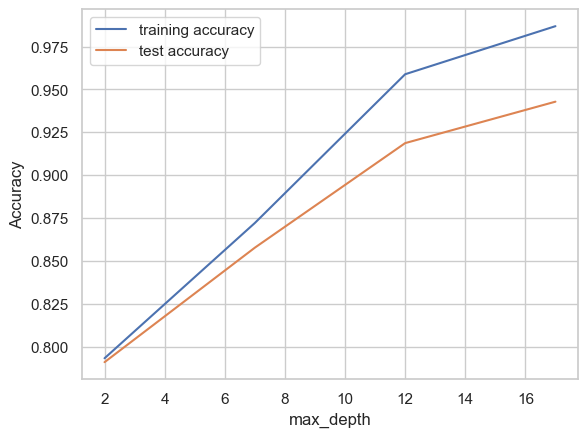

In [121]:
# plotting accuracies with max_depth
plt.figure()
plt.plot(scores["param_max_depth"],
         scores["mean_train_score"],
         label="training accuracy")
plt.plot(scores["param_max_depth"],
         scores["mean_test_score"],
         label="test accuracy")
plt.xlabel("max_depth")
plt.ylabel("Accuracy")
plt.legend()

plt.show()

- We see that as we increase the value of max_depth, both train and test scores increase till a point.
- The ensemble tries to overfit as we increase the max_depth.
- **Thus, controlling the depth of the constituent trees will help reduce overfitting in the forest.**

**Tuning n_estimators**

Now let's look at optimum values for n_estimators and see how the value of n_estimators impacts the overall accuracy.

We'll specify an appropriately low value of max_depth, so that the trees do not overfit.

In [122]:
# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'n_estimators': range(100, 1500, 500)}

# instantiate the model (note we are specifying a max_depth)
rf = RandomForestClassifier(max_depth=4, class_weight ='balanced', random_state=100)


# fit tree on training data
rf = GridSearchCV(rf, parameters,
                    cv=n_folds, verbose = 1,
                   scoring="accuracy",return_train_score=True, n_jobs = -1)
rf.fit(X_train_pca, y_train)

print(rf.best_score_)
print(rf.best_params_)

Fitting 5 folds for each of 3 candidates, totalling 15 fits
0.8214134601402863
{'n_estimators': 1100}


In [123]:
# scores of GridSearch CV
scores = rf.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,18.06,0.43,0.09,0.02,100,{'n_estimators': 100},0.81,0.82,0.82,0.82,0.82,0.82,0.01,3,0.82,0.82,0.82,0.82,0.82,0.82,0.00
1,91.26,0.39,0.44,0.06,600,{'n_estimators': 600},0.81,0.83,0.82,0.82,0.82,0.82,0.01,2,0.83,0.82,0.82,0.82,0.82,0.82,0.00
2,141.80,4.44,0.46,0.05,1100,{'n_estimators': 1100},0.81,0.83,0.82,0.83,0.82,0.82,0.01,1,0.83,0.82,0.83,0.82,0.83,0.83,0.00


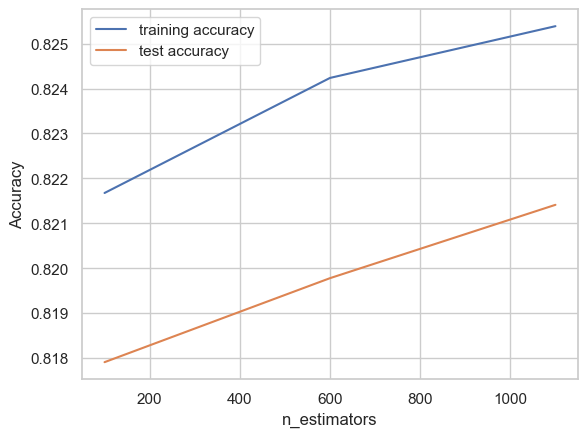

In [124]:
# plotting accuracies with n_estimators
plt.figure()
plt.plot(scores["param_n_estimators"],
         scores["mean_train_score"],
         label="training accuracy")
plt.plot(scores["param_n_estimators"],
         scores["mean_test_score"],
         label="test accuracy")
plt.xlabel("n_estimators")
plt.ylabel("Accuracy")
plt.legend()

plt.show()

**Tuning max_features**

We'll see the model performance varies with max_features, which is the maximum number of features considered for splitting at a node.

In [125]:
# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'max_features': [4, 8, 14, 20, 24]}

# instantiate the model
rf = RandomForestClassifier(max_depth=4,class_weight='balanced',random_state=100)


# fit tree on training data
rf = GridSearchCV(rf, parameters, verbose = 1,cv=n_folds,
                   scoring="accuracy",n_jobs = -1, return_train_score = True)
rf.fit(X_train_pca, y_train)

print(rf.best_score_)
print(rf.best_params_)

Fitting 5 folds for each of 5 candidates, totalling 25 fits
0.8227291526738172
{'max_features': 14}


In [126]:
# scores of GridSearch CV
scores = rf.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_features,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,9.24,0.27,0.07,0.01,4,{'max_features': 4},0.79,0.82,0.81,0.82,0.81,0.81,0.01,5,0.81,0.81,0.82,0.81,0.81,0.81,0.00
1,16.83,0.53,0.09,0.03,8,{'max_features': 8},0.81,0.82,0.82,0.82,0.82,0.82,0.01,2,0.82,0.82,0.82,0.82,0.82,0.82,0.00
2,29.17,1.34,0.06,0.00,14,{'max_features': 14},0.81,0.83,0.82,0.83,0.82,0.82,0.01,1,0.83,0.82,0.83,0.83,0.83,0.83,0.00
3,36.90,1.70,0.05,0.00,20,{'max_features': 20},0.81,0.82,0.82,0.82,0.82,0.82,0.00,3,0.82,0.82,0.82,0.82,0.82,0.82,0.00
4,39.06,2.91,0.04,0.01,24,{'max_features': 24},0.81,0.82,0.82,0.82,0.82,0.82,0.00,4,0.82,0.82,0.82,0.82,0.82,0.82,0.00


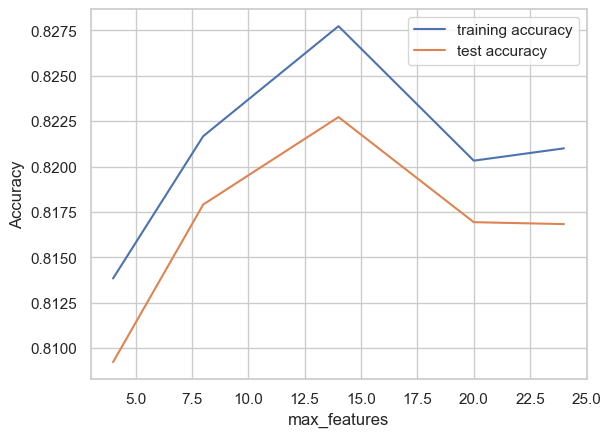

In [127]:
# plotting accuracies with max_features
plt.figure()
plt.plot(scores["param_max_features"],
         scores["mean_train_score"],
         label="training accuracy")
plt.plot(scores["param_max_features"],
         scores["mean_test_score"],
         label="test accuracy")
plt.xlabel("max_features")
plt.ylabel("Accuracy")
plt.legend()

plt.show()

**Tuning min_samples_leaf**

The hyperparameter min_samples_leaf is the minimum number of samples required to be at a leaf node:
- If int, then consider min_samples_leaf as the minimum number.
- If float, then min_samples_leaf is a percentage and ceil(min_samples_leaf * n_samples) are the minimum number of samples for each node.

In [128]:
# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'min_samples_leaf': range(100, 400, 50)}

# instantiate the model
rf = RandomForestClassifier(class_weight ='balanced',random_state=100)


# fit tree on training data
rf = GridSearchCV(rf, parameters,
                    cv=n_folds,
                   scoring="accuracy",verbose =1, return_train_score = True, n_jobs = -1)
rf.fit(X_train_pca, y_train)
print(rf.best_score_)
print(rf.best_params_)

Fitting 5 folds for each of 6 candidates, totalling 30 fits
0.8525155831296436
{'min_samples_leaf': 100}


In [129]:
# scores of GridSearch CV
scores = rf.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_min_samples_leaf,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,34.55,0.57,0.11,0.02,100,{'min_samples_leaf': 100},0.84,0.86,0.85,0.85,0.85,0.85,0.01,1,0.87,0.87,0.87,0.86,0.87,0.87,0.00
1,32.37,0.35,0.10,0.02,150,{'min_samples_leaf': 150},0.83,0.85,0.84,0.85,0.84,0.84,0.01,2,0.86,0.85,0.85,0.85,0.85,0.85,0.00
2,28.10,1.20,0.09,0.00,200,{'min_samples_leaf': 200},0.83,0.85,0.84,0.84,0.84,0.84,0.00,3,0.85,0.85,0.85,0.84,0.85,0.85,0.00
3,26.55,0.94,0.08,0.00,250,{'min_samples_leaf': 250},0.82,0.84,0.83,0.84,0.83,0.83,0.01,4,0.84,0.84,0.84,0.84,0.84,0.84,0.00
4,23.71,2.26,0.07,0.01,300,{'min_samples_leaf': 300},0.82,0.84,0.83,0.83,0.83,0.83,0.01,5,0.84,0.84,0.84,0.83,0.84,0.84,0.00


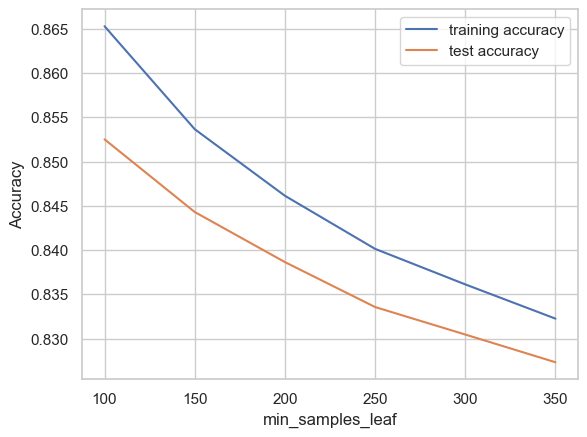

In [130]:
# plotting accuracies with min_samples_leaf
plt.figure()
plt.plot(scores["param_min_samples_leaf"],
         scores["mean_train_score"],
         label="training accuracy")
plt.plot(scores["param_min_samples_leaf"],
         scores["mean_test_score"],
         label="test accuracy")
plt.xlabel("min_samples_leaf")
plt.ylabel("Accuracy")
plt.legend()

plt.show()

**We can see that as the value of min_samples_leaf decreases, the model starts to overfit!**

**Tuning min_samples_split**

Checking the performance of the ensemble as we vary min_samples_split.

In [131]:
# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'min_samples_split': range(200, 500, 50)}

# instantiate the model
rf = RandomForestClassifier(class_weight = 'balanced',random_state=100)


# fit tree on training data
rf = GridSearchCV(rf, parameters, verbose = 1,
                    cv=n_folds,
                   scoring="accuracy",n_jobs =-1, return_train_score = True)
rf.fit(X_train_pca, y_train)

print(rf.best_score_)
print(rf.best_params_)

Fitting 5 folds for each of 6 candidates, totalling 30 fits
0.8689875501145972
{'min_samples_split': 200}


In [132]:
# scores of GridSearch CV
scores = rf.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,45.39,1.30,0.12,0.01,200,{'min_samples_split': 200},0.86,0.87,0.87,0.87,0.87,0.87,0.01,1,0.89,0.89,0.89,0.89,0.89,0.89,0.00
1,43.59,1.13,0.11,0.01,250,{'min_samples_split': 250},0.85,0.87,0.86,0.86,0.86,0.86,0.01,2,0.88,0.88,0.88,0.88,0.88,0.88,0.00
2,42.06,1.39,0.11,0.00,300,{'min_samples_split': 300},0.85,0.86,0.86,0.86,0.86,0.86,0.01,3,0.87,0.87,0.87,0.87,0.87,0.87,0.00
3,42.14,1.12,0.10,0.01,350,{'min_samples_split': 350},0.84,0.86,0.85,0.86,0.85,0.85,0.01,4,0.87,0.86,0.87,0.87,0.87,0.87,0.00
4,38.22,4.05,0.09,0.01,400,{'min_samples_split': 400},0.84,0.86,0.85,0.85,0.85,0.85,0.01,5,0.86,0.86,0.86,0.86,0.86,0.86,0.00


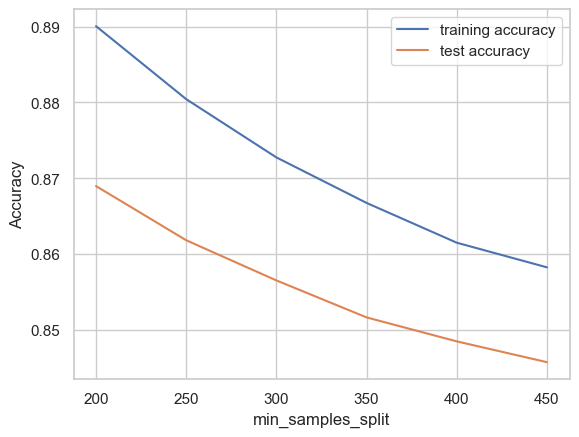

In [133]:
# plotting accuracies with min_samples_split
plt.figure()
plt.plot(scores["param_min_samples_split"],
         scores["mean_train_score"],
         label="training accuracy")
plt.plot(scores["param_min_samples_split"],
         scores["mean_test_score"],
         label="test accuracy")
plt.xlabel("min_samples_split")
plt.ylabel("Accuracy")
plt.legend()

plt.show()

Finally, we find the optimal hyperparameters using GridSearchCV

In [134]:
# Create the parameter grid based on the results of random search
param_grid = {
    'max_depth': [4,8,10],
    'min_samples_leaf': range(100, 400, 200),
    'min_samples_split': range(200, 500, 200),
    'n_estimators': [100,200, 300],
    'max_features': [5, 10]}
# Create a based model
rf = RandomForestClassifier()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid,
                          cv = 3, n_jobs = -1,verbose = 1)

In [135]:
# Fitting the grid search to the data

grid_search.fit(X_train_pca, y_train)

Fitting 3 folds for each of 72 candidates, totalling 216 fits


GridSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [4, 8, 10], 'max_features': [5, 10],
                         'min_samples_leaf': range(100, 400, 200),
                         'min_samples_split': range(200, 500, 200),
                         'n_estimators': [100, 200, 300]},
             verbose=1)

In [136]:
# printing the optimal accuracy score and hyperparameters

print('We can get accuracy of',grid_search.best_score_,'using',grid_search.best_params_)

We can get accuracy of 0.8482265024734238 using {'max_depth': 10, 'max_features': 10, 'min_samples_leaf': 100, 'min_samples_split': 200, 'n_estimators': 300}


In [137]:
# model with the best hyperparameters
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(bootstrap=True,class_weight = 'balanced',
                             max_depth=grid_search.best_params_['max_depth'],
                             min_samples_split=grid_search.best_params_['min_samples_split'],
                             max_features=grid_search.best_params_['max_features'],
                             n_estimators =grid_search.best_params_['n_estimators'],
                             random_state=100, oob_score=True)

In [138]:
# fitting the Model
rfc.fit(X_train_pca,y_train)

RandomForestClassifier(class_weight='balanced', max_depth=10, max_features=10,
                       min_samples_split=200, n_estimators=300, oob_score=True,
                       random_state=100)

In [139]:
# predicting using test data

predictions = rfc.predict(X_test_pca)

In [140]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.97      0.89      0.93      8143
           1       0.37      0.71      0.49       767

    accuracy                           0.87      8910
   macro avg       0.67      0.80      0.71      8910
weighted avg       0.92      0.87      0.89      8910



In [141]:
rfc.oob_score_

0.8659351647195032

- OOB score tells how accurate our model will be, so we calculated the OOB score based on the train data set.
- Next, we will also see the predictions and other metrics.

In [142]:
#create confusion matrix
cm = metrics.confusion_matrix(y_test,predictions)
print("confusoin matrix \t\n",cm)
# Accuracy
print("Accuracy:-",round(metrics.accuracy_score(y_test, predictions),2))

#checking sesitivity
print("sensitivity \t", (cm[1,1]/(cm[1,0]+cm[1,1])).round(2))


#checking  specificity
print("specificity \t", (cm[0,0]/(cm[0,0]+cm[0,1])).round(2))

# check area under curve
y_pred_prob = rfc.predict_proba(X_test_pca)[:, 1]
print("AUC:    \t", round(roc_auc_score(y_test, y_pred_prob),2))

confusoin matrix 	
 [[7222  921]
 [ 221  546]]
Accuracy:- 0.87
sensitivity 	 0.71
specificity 	 0.89
AUC:    	 0.88


-------------------

### Modelling without PCA

**Logistic Regression without PCA**

In [143]:
import statsmodels.api as sm

# Instantiate the model and also Adding the constant to X_train

log_no_pca = sm.GLM(y_train,(sm.add_constant(X_train)), family=sm.families.Binomial())

# Fitting the model
log_no_pca = log_no_pca.fit().summary()

# Summary
log_no_pca

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  Churn   No. Observations:                38004
Model:                            GLM   Df Residuals:                    37869
Model Family:                Binomial   Df Model:                          134
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                    nan
Date:                Tue, 06 Feb 2024   Deviance:                       26998.
Time:                        21:49:55   Pearson chi2:                 1.56e+06
No. Iterations:                   100   Pseudo R-squ. (CS):                nan
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   1.0945      0.061     17.947      0.000       0.975       1.214
arpu_6                  0.2102      0.057      3.698      0.000       0.099       0.322
arpu_7                  0.1538      0.062      2.482      0.013       0.032       0.275
arpu_8                  0.6301      0.082      7.676      0.000       0.469       0.791
onnet_mou_6             7.7128      2.400      3.214      0.001       3.010      12.416
onnet_mou_7            -3.8650      1.458     -2.652      0.008      -6.722      -1.008
onnet_mou_8             2.8282      1.231      2.298      0.022       0.416       5.241
offnet_mou_6            8.3975      2.358      3.561      0.000       3.776      13.019
offnet_mou_7           -4.6921      1.468     -3.196      0.001      -7.570      -1.814
offnet_mou_8            2.1295      1.244      1.711      0.087      -0.309       4.568
roam_ic_mou_6           0.1103      0.030      3.638      0.000       0.051       0.170
roam_ic_mou_7          -0.0067      0.029     -0.230      0.818      -0.064       0.051
roam_ic_mou_8          -0.0097      0.027     -0.363      0.716      -0.062       0.042
roam_og_mou_6          -2.1552      0.610     -3.530      0.000      -3.352      -0.959
roam_og_mou_7           1.1311      0.320      3.529      0.000       0.503       1.759
roam_og_mou_8          -0.5974      0.318     -1.877      0.061      -1.221       0.026
loc_og_t2t_mou_6     1773.5991    671.155      2.643      0.008     458.159    3089.039
loc_og_t2t_mou_7     1182.7211    645.900      1.831      0.067     -83.220    2448.662
loc_og_t2t_mou_8     6822.2323    590.797     11.548      0.000    5664.292    7980.172
loc_og_t2m_mou_6     1766.6390    668.752      2.642      0.008     455.909    3077.369
loc_og_t2m_mou_7     1150.4873    628.196      1.831      0.067     -80.755    2381.729
loc_og_t2m_mou_8     7060.3376    611.374     11.548      0.000    5862.066    8258.609
loc_og_t2f_mou_6      130.7246     49.473      2.642      0.008      33.759     227.691
loc_og_t2f_mou_7       89.9699     49.218      1.828      0.068      -6.496     186.436
loc_og_t2f_mou_8      552.8931     47.867     11.551      0.000     459.075     646.711
loc_og_t2c_mou_6       -0.0275      0.023     -1.211      0.226      -0.072       0.017
loc_og_t2c_mou_7        0.1599      0.027      5.826      0.000       0.106       0.214
loc_og_t2c_mou_8       -0.0609      0.020     -3.105      0.002      -0.099      -0.022
loc_og_mou_6        -5459.7892   1283.762     -4.253      0.000   -7975.916   -2943.663
loc_og_mou_7        -4137.1216   1276.631     -3.241      0.001   -6639.272   -1634.971
loc_og_mou_8        -3067.8659   1240.890     -2.472      0.013   -5499.965    -635.767
std_og_t2t_mou_6    -2200.0888   1650.922     -1.333      0.183   -5435.836    1035.658
std

- As we see there are Many features with high p-values and hence those are insignificant for our model.
- Also, there are few features with negative coefficients as well.

**Tuning the parameters**

We will first select some of the features using RFE and then we will manually eliminate the remaining features based on p-values and VIF, untill we get the best model.

**Feature Selection using RFE**

In [144]:
# Importing logistic regression from sklearn
from sklearn.linear_model import LogisticRegression

# Instantiate the logistic regression
logreg = LogisticRegression()

**Using RFE with 15 columns/features**

In [145]:
# Importing RFE
from sklearn.feature_selection import RFE

# Intantiate RFE with 15 columns
rfe = RFE(logreg, n_features_to_select=15)

# Fit the rfe model with train set
rfe = rfe.fit(X_train,y_train)

In [168]:
# RFE selected columns
rfe_selected_columns  = X_train.columns[rfe.support_]
print(rfe_selected_columns )

Index(['arpu_6', 'onnet_mou_7', 'loc_og_t2t_mou_8', 'std_og_t2t_mou_7',
       'og_others_8', 'total_og_mou_8', 'loc_ic_t2m_mou_7', 'loc_ic_t2m_mou_8',
       'total_ic_mou_8', 'total_rech_num_7', 'total_rech_num_8',
       'last_day_rch_amt_8', 'max_rech_data_8', 'dec_rech_action',
       'dec_arpu_action'],
      dtype='object')


### Model - 1

In [169]:
# Adding constant to X_train
X_train_sm_1 = sm.add_constant(X_train[rfe_cols])

#Instantiate the model
log_no_pca_1 = sm.GLM(y_train, X_train_sm_1, family=sm.families.Binomial())

# Fit the model
log_no_pca_1 = log_no_pca_1.fit()

log_no_pca_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  Churn   No. Observations:                38004
Model:                            GLM   Df Residuals:                    37988
Model Family:                Binomial   Df Model:                           15
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                    nan
Date:                Tue, 06 Feb 2024   Deviance:                       30682.
Time:                        22:40:31   Pearson chi2:                 1.74e+09
No. Iterations:                    13   Pseudo R-squ. (CS):                nan
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  0.6686      0.055     12.239      0.000       0.562       0.776
arpu_6                 0.4841      0.019     25.899      0.000       0.447       0.521
onnet_mou_7            1.1346      0.081     14.075      0.000       0.977       1.293
loc_og_t2t_mou_8      -0.8345      0.062    -13.497      0.000      -0.956      -0.713
std_og_t2t_mou_7      -0.8801      0.076    -11.575      0.000      -1.029      -0.731
og_others_8           -6.6596      3.125     -2.131      0.033     -12.784      -0.535
total_og_mou_8        -0.6087      0.027    -22.400      0.000      -0.662      -0.555
loc_ic_t2m_mou_7       0.8036      0.041     19.481      0.000       0.723       0.884
loc_ic_t2m_mou_8      -1.7387      0.073    -23.896      0.000      -1.881      -1.596
total_ic_mou_8        -0.8389      0.052    -16.241      0.000      -0.940      -0.738
total_rech_num_7       0.6962      0.028     25.076      0.000       0.642       0.751
total_rech_num_8      -1.2223      0.036    -34.114      0.000      -1.293      -1.152
last_day_rch_amt_8    -0.5616      0.022    -25.987      0.000      -0.604      -0.519
max_rech_data_8       -0.6322      0.020    -31.003      0.000      -0.672      -0.592
dec_rech_action       -0.9387      0.042    -22.418      0.000      -1.021      -0.857
dec_arpu_action       -0.6438      0.040    -16.108      0.000      -0.722      -0.565
======================================================================================
"""

In [170]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

# FUNCTION FOR VIF calculation

def VIF_CALC(df):
    vif=pd.DataFrame()
    vif['Features']= df.columns
    vif['VIF'] = [variance_inflation_factor(df.values, i) for i in range(df.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif=vif.sort_values(by="VIF", ascending=False)
    return vif

In [171]:
VIF_CALC(X_train[rfe_cols])

,Features,VIF
1,onnet_mou_7,13.79
3,std_og_t2t_mou_7,12.75
7,loc_ic_t2m_mou_8,4.20
14,dec_arpu_action,3.86
13,dec_rech_action,3.85
2,loc_og_t2t_mou_8,3.37
8,total_ic_mou_8,3.02
10,total_rech_num_8,2.63
6,loc_ic_t2m_mou_7,2.40
5,total_og_mou_8,2.19


In [173]:
# Removing onnet_mou_7 column 
log_cols.remove('onnet_mou_7')
print(log_cols)

['arpu_6', 'loc_og_t2t_mou_8', 'std_og_t2t_mou_7', 'og_others_8', 'total_og_mou_8', 'loc_ic_t2m_mou_7', 'loc_ic_t2m_mou_8', 'total_ic_mou_8', 'total_rech_num_7', 'total_rech_num_8', 'last_day_rch_amt_8', 'max_rech_data_8', 'dec_rech_action', 'dec_arpu_action']


**Model 2**

In [174]:
# Adding constant to X_train
X_train_sm_2 = sm.add_constant(X_train[log_cols])

#Instantiate the model
log_no_pca_2 = sm.GLM(y_train, X_train_sm_2, family=sm.families.Binomial())

# Fit the model
log_no_pca_2 = log_no_pca_2.fit()

log_no_pca_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  Churn   No. Observations:                38004
Model:                            GLM   Df Residuals:                    37989
Model Family:                Binomial   Df Model:                           14
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                    nan
Date:                Tue, 06 Feb 2024   Deviance:                       30882.
Time:                        22:45:34   Pearson chi2:                 7.91e+10
No. Iterations:                    13   Pseudo R-squ. (CS):                nan
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  0.6769      0.055     12.323      0.000       0.569       0.785
arpu_6                 0.5035      0.019     27.136      0.000       0.467       0.540
loc_og_t2t_mou_8      -0.2091      0.036     -5.798      0.000      -0.280      -0.138
std_og_t2t_mou_7       0.1572      0.018      8.551      0.000       0.121       0.193
og_others_8           -6.8721      3.189     -2.155      0.031     -13.123      -0.621
total_og_mou_8        -0.6431      0.027    -23.695      0.000      -0.696      -0.590
loc_ic_t2m_mou_7       0.8456      0.041     20.554      0.000       0.765       0.926
loc_ic_t2m_mou_8      -1.8189      0.072    -25.100      0.000      -1.961      -1.677
total_ic_mou_8        -0.8511      0.052    -16.483      0.000      -0.952      -0.750
total_rech_num_7       0.7223      0.028     25.912      0.000       0.668       0.777
total_rech_num_8      -1.2426      0.036    -34.709      0.000      -1.313      -1.172
last_day_rch_amt_8    -0.5474      0.021    -25.640      0.000      -0.589      -0.506
max_rech_data_8       -0.6397      0.020    -31.483      0.000      -0.680      -0.600
dec_rech_action       -0.9555      0.042    -22.953      0.000      -1.037      -0.874
dec_arpu_action       -0.6236      0.040    -15.758      0.000      -0.701      -0.546
======================================================================================
"""

In [175]:
# Checking VIF of Model-2

VIF_CALC(X_train[log_cols])

,Features,VIF
6,loc_ic_t2m_mou_8,4.19
13,dec_arpu_action,3.85
12,dec_rech_action,3.84
7,total_ic_mou_8,3.02
9,total_rech_num_8,2.63
5,loc_ic_t2m_mou_7,2.40
4,total_og_mou_8,2.18
8,total_rech_num_7,2.08
2,std_og_t2t_mou_7,1.36
1,loc_og_t2t_mou_8,1.30


Here we see the p-values are in the acceptable range also the VIFs of all the values are also below 5 which is a good and in acceptable range.

Hence Model 2 will be the final Model

#### Model performance on the train set

In [177]:
# Getting the predicted value on the train set
y_train_pred_no_pca = log_no_pca_2.predict(X_train_sm_2)
y_train_pred_no_pca.head()

0                   0.03
1                   0.17
2                   0.12
3                   0.04
4                   0.62
dtype: float64

In [178]:
y_train_pred_final = pd.DataFrame({'churn':y_train.values, 'churn_prob':y_train_pred_no_pca.values})

#Assigning Customer ID for each record for better readblity
#CustID is the index of each record.
y_train_pred_final['CustID'] = y_train_pred_final.index

y_train_pred_final.head()

,churn,churn_prob,CustID
0,0,0.03,0
1,0,0.17,1
2,0,0.12,2
3,0,0.04,3
4,0,0.62,4


Finding the Optimal Probablity CutOff Point.

In [179]:
# Creating columns for different probablity cutoffs
prob_cutoff = [float(p/10) for p in range(10)]

for i in prob_cutoff:
    y_train_pred_final[i] = y_train_pred_final['churn_prob'].map(lambda x : 1 if x > i else 0)
    
y_train_pred_final.head()

,churn,churn_prob,CustID,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.03,0,1,0,0,0,0,0,0,0,0,0
1,0,0.17,1,1,1,0,0,0,0,0,0,0,0
2,0,0.12,2,1,1,0,0,0,0,0,0,0,0
3,0,0.04,3,1,0,0,0,0,0,0,0,0,0
4,0,0.62,4,1,1,1,1,1,1,1,0,0,0


Now Calculation of the accuracy sensitivity and specificity for various probability cutoffs.

In [180]:
# Creating a dataframe
cutoff_df = pd.DataFrame(columns=['probability', 'accuracy', 'sensitivity', 'specificity'])

for i in prob_cutoff:
    cm1 = metrics.confusion_matrix(y_train_pred_final['churn'], y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

              probability             accuracy          sensitivity  \
0.00                 0.00                 0.50                 1.00   
0.10                 0.10                 0.68                 0.97   
0.20                 0.20                 0.75                 0.95   
0.30                 0.30                 0.79                 0.93   
0.40                 0.40                 0.82                 0.90   
0.50                 0.50                 0.84                 0.85   
0.60                 0.60                 0.84                 0.80   
0.70                 0.70                 0.82                 0.72   
0.80                 0.80                 0.77                 0.59   
0.90                 0.90                 0.62                 0.26   

              specificity  
0.00                 0.00  
0.10                 0.39  
0.20                 0.54  
0.30                 0.66  
0.40                 0.75  
0.50                 0.82  
0.60                 0

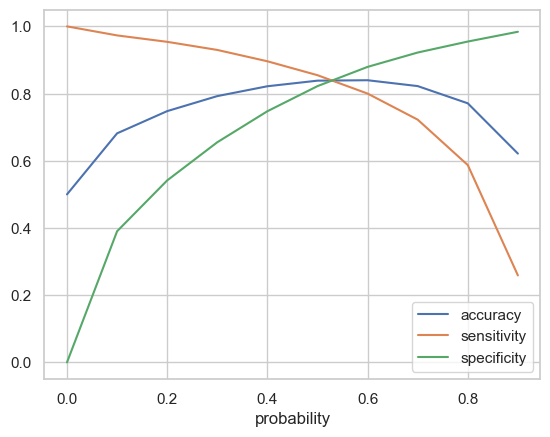

In [181]:
# Plotting accuracy, sensitivity and specificity for different probabilities.
cutoff_df.plot('probability', ['accuracy','sensitivity','specificity'])
plt.show()

Analysis of the above curve

Accuracy - Becomes stable around 0.5 approx

Sensitivity - Decreases with the increased probablity.

Specificity - Increases with the increasing probablity.

Hence we consider cutoff point to be 0.5

In [182]:
# Creating a column with name "predicted", which is the predicted value for 0.6 cutoff 
y_train_pred_final['predicted'] = y_train_pred_final['churn_prob'].map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

,churn,churn_prob,CustID,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,predicted
0,0,0.03,0,1,0,0,0,0,0,0,0,0,0,0
1,0,0.17,1,1,1,0,0,0,0,0,0,0,0,0
2,0,0.12,2,1,1,0,0,0,0,0,0,0,0,0
3,0,0.04,3,1,0,0,0,0,0,0,0,0,0,0
4,0,0.62,4,1,1,1,1,1,1,1,0,0,0,1


**Evaluation Metrics**

In [183]:
# Confusion metrics
confusion = metrics.confusion_matrix(y_train_pred_final['churn'], y_train_pred_final['predicted'])
print(confusion)

[[15623  3379]
 [ 2761 16241]]


In [184]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [185]:
# Accuracy
print("Accuracy:-",round(metrics.accuracy_score(y_train_pred_final['churn'], y_train_pred_final['predicted']),2))

# Sensitivity
print("Sensitivity:-",round(TP / float(TP+FN),2))

# Specificity
print("Specificity:-",round( TN / float(TN+FP),2))

# Recall
print("Recall:-" , round(TP/float(TP+FN),2))

Accuracy:- 0.84
Sensitivity:- 0.85
Specificity:- 0.82
Recall:- 0.85


Here as we can see we got good accuracy, sensitivity and specificity on the train set prediction.

In [186]:
# Plotting the ROC curve.

# ROC Curve function

def PLOT_ROC( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

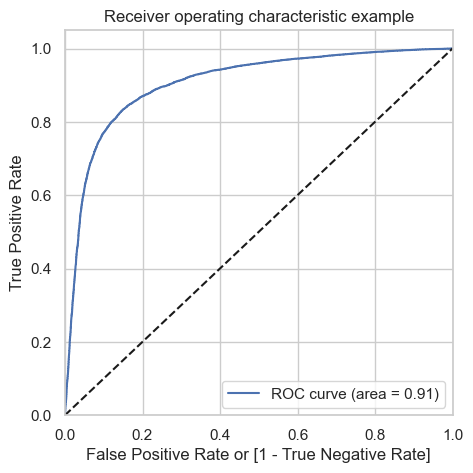

In [187]:
PLOT_ROC(y_train_pred_final['churn'], y_train_pred_final['churn_prob'])

As we can see from the curve we are getting a AUC value of 0.89 which is a very good value, there by indicating that we have a good predictive model.

**Model Performance on the test set**

In [188]:
# Taking a copy of the test set
X_test_log = X_test.copy()

# Taking only the columns, which are selected in the train set after removing insignificant and multicollinear variables
X_test_log = X_test_log[log_cols]

# Adding constant on the test set
X_test_sm = sm.add_constant(X_test_log)

In [189]:
# Predict on the test set using the FINAL MODEL i.e MODEL-2
y_test_pred = log_no_pca_2.predict(X_test_sm)

y_test_pred.head()

2722                    0.49
28720                   0.01
43175                   0.17
50024                   0.98
37809                   0.14
dtype: float64

In [190]:
# Converting y_test_pred to a dataframe
y_pred_1 = pd.DataFrame(y_test_pred)
y_pred_1.head()

,0
2722,0.49
28720,0.01
43175,0.17
50024,0.98
37809,0.14


In [191]:
# Convetting y_test to a dataframe
y_test_df = pd.DataFrame(y_test)
y_test_df.head()

,Churn
2722,0
28720,0
43175,0
50024,1
37809,0


In [192]:
# Putting index to Customer ID 
y_test_df['CustID'] = y_test_df.index

In [193]:
# Removing index form the both dataframes for merging them side by side
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [194]:
# Concatinating y_pred_1 and y_test_df
y_test_pred_final = pd.concat([y_test_df, y_pred_1], axis=1)

y_test_pred_final.head()

,Churn,CustID,0
0,0,2722,0.49
1,0,28720,0.01
2,0,43175,0.17
3,1,50024,0.98
4,0,37809,0.14


In [195]:
# Renaming the '0' column as churn probablity
y_test_pred_final = y_test_pred_final.rename(columns={0:'churn_prob'})

y_test_pred_final.head()

,Churn,CustID,churn_prob
0,0,2722,0.49
1,0,28720,0.01
2,0,43175,0.17
3,1,50024,0.98
4,0,37809,0.14


In [196]:
# In the test set using optimal probablity cutoff 0.6, that we considered previously. 
y_test_pred_final['test_predicted'] = y_test_pred_final['churn_prob'].map(lambda x: 1 if x > 0.6 else 0)

y_test_pred_final.head()

,Churn,CustID,churn_prob,test_predicted
0,0,2722,0.49,0
1,0,28720,0.01,0
2,0,43175,0.17,0
3,1,50024,0.98,1
4,0,37809,0.14,0


**EVALUATION METRICS**

In [197]:
# Confusion matrix
confusion = metrics.confusion_matrix(y_test_pred_final['Churn'], y_test_pred_final['test_predicted'])
print(confusion)

[[7219  924]
 [ 189  578]]


In [198]:
# Accuracy
print("Accuracy:-",round(metrics.accuracy_score(y_test_pred_final['Churn'], y_test_pred_final['test_predicted']),2))

# Sensitivity
print("Sensitivity:-",round(TP / float(TP+FN),2))

# Specificity
print("Specificity:-", round(TN / float(TN+FP),2))

# Recall
print("Recall:-" , round(TP/float(TP+FN),2))

Accuracy:- 0.88
Sensitivity:- 0.85
Specificity:- 0.82
Recall:- 0.85


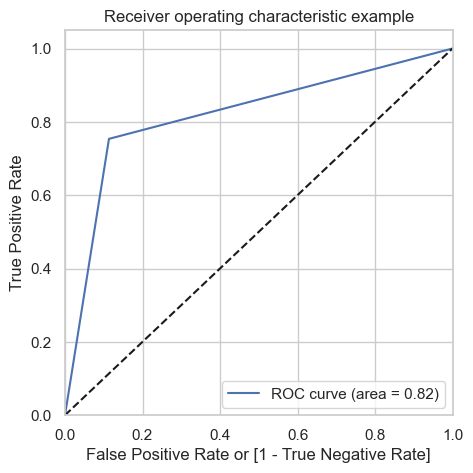

In [199]:
PLOT_ROC(y_test_pred_final['Churn'], y_test_pred_final['test_predicted'])

As we can see we from the above ROC plot we get AUC of 0.76.

**Model summary** (Logistic Regression Without PCA)

-  `Train set`
  * Accuracy = 0.84
  * Sensitivity = 0.85
  * Specificity = 0.82
  * Recall = 0.85  
-  `Test set`
  * Accuracy = 0.88
  * Sensitivity = 0.85
  * Specificity = 0.82
  * Recall = 0.85

In [202]:
model_stats = pd.DataFrame(
    {'model':['Logistic Regression with PCA','Decision Tree with PCA','Random Forest with PCA','Logistic without PCA'],
                      
    'Recall':       [0.86,0.86,0.71,0.85],
    'Test accuracy':     [0.82,0.84,0.87,0.88],
    'Roc_auc_score':[0.89,0.76,0.88,0.76],
    })

model_stats.sort_values(by=['Recall','Test accuracy','Roc_auc_score'],ascending=False)

,model,Recall,Test accuracy,Roc_auc_score
1,Decision Tree with PCA,0.86,0.84,0.76
0,Logistic Regression with PCA,0.86,0.82,0.89
3,Logistic without PCA,0.85,0.88,0.76
2,Random Forest with PCA,0.71,0.87,0.88


In [200]:
features = dt_pca_model.feature_importances_
cols =[X.iloc[:,sorted(range(len(features)), key=lambda i: features[i])[-10:]].columns]
                
cols

[Index(['loc_og_t2t_mou_7', 'loc_og_t2c_mou_8', 'loc_ic_t2t_mou_7',
        'roam_ic_mou_7', 'onnet_mou_7', 'loc_og_t2c_mou_7', 'arpu_7',
        'onnet_mou_8', 'roam_og_mou_8', 'arpu_6'],
       dtype='object')]

In [201]:
Imp_Features=pd.DataFrame({'FEATURES':['loc_og_t2m_mou_7', 'total_og_mou_6', 'loc_og_t2t_mou_7',
        'roam_ic_mou_7', 'onnet_mou_7', 'arpu_7', 'loc_og_t2c_mou_7',
        'onnet_mou_8', 'roam_og_mou_8', 'arpu_6']})
Imp_Features

,FEATURES
0,loc_og_t2m_mou_7
1,total_og_mou_6
2,loc_og_t2t_mou_7
3,roam_ic_mou_7
4,onnet_mou_7
5,arpu_7
6,loc_og_t2c_mou_7
7,onnet_mou_8
8,roam_og_mou_8
9,arpu_6


----------------------------------------------------

### Conclusion and Strategy ahead

From EDA, we observed that there is considerable drop in recharge, call usage and data usage in the 8th month which is the Action Phase. Below are the important features:

- loc_og_t2m_mou_7
- total_og_mou_6
- loc_og_t2t_mou_7
- roam_ic_mou_7
- onnet_mou_7
- arpu_6
- arpu_7
- loc_og_t2c_mou_7
- onnet_mou_8
- roam_og_mou_8

Average revenue per user in the 8th month plays a vital role in deciding churn. A sudden drop in it might indicate that the customer might be thinking about churning and appropriate actions should be taken.

Local Minutes of usage (outgoing) are the most affecting features on the customer churn.

Roaming Minutes of usage (incoming & outgoing) are also affecting features on the customer churn.

Total minutes of usage for outgoing is also an important factor affecting the churn.

**Following strategies can be incorporated :**

- Concentrate on users with 1.27 std devations lower than average incoming calls from fixed line. They are most likely to churn. - Concentrate on users who recharge less number of times ( less than 1.2 std deviations compared to avg) in the 8th month. They are second most likely to churn.
- Use models with high sensitivity since these are the best for predicting churn.
- Sudden drop in Local Minutes of usage might be because of the unsatisfactory customer service or because of poor network or unsuitable customer schemes/plans. Efforts shall be made to provide better network and focus on customer satisfaction.
- Based on the usage / last recharge/ onnet usage, routine feedback calls should be made for customer satisfaction and services that can understand their grievances & expectations. Appropriate action should be taken to avoid them from churning.
- Various attractive offers can be introduced to customers showing sudden drop in total amount spent on calls & data recharge in the action phase to lure them.
- Customised plans should be provided to such customers to stop them from churning.
- Promotional offers can also be very helpful